In [1]:
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [123]:
#Import all the necessary Basic modules
import numpy as np
import pandas as pd
from IPython.core.display import HTML
from colorama import Fore,Back,Style
import scipy.stats as stats
from sklearn import tree
from os import system

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Basic SkLearn Models and Util classes
from sklearn import preprocessing
from sklearn import metrics
from sklearn.utils import resample


#Decision Tree and Ensemble Classifiers
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# 1. Load the dataset

In [3]:
parkinson_df = pd.read_csv('D://AIML STUDY MATERIAL//EnsembleTechnique//Project//parkinsons.data')
parkinson_df.to_csv('D://AIML STUDY MATERIAL//EnsembleTechnique//Project//parkinsons.data',index=None)
parkinson_df = parkinson_df.rename(columns={"Unnamed: 0":"Serial_No"})

In [4]:
display(HTML(parkinson_df.head(10).to_html()))

<b>Source:</b>

The dataset was created by Max Little of the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorded the speech signals. The original study published the 
feature extraction methods for general voice disorders.

-----------------------------------------------------

<b> Data Set Information:</b>

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an 
instance corresponding to one voice recording. There are around six 
recordings per patient, the name of the patient is identified in the first 
column.For further information or to pass on comments, please contact Max 
Little (littlem '@' robots.ox.ac.uk).

Further details are contained in the following reference -- if you use this 
dataset, please cite:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 
'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', 
IEEE Transactions on Biomedical Engineering (to appear).


| Attribute Name | Description|
| --- | --- |
|Serial_No | Data set Serial No|
| name  | ASCII subject name and recording number|
|MDVP:Fo(Hz)   | Average vocal fundamental frequency|
| MDVP:Fhi(Hz) | Maximum vocal fundamental frequency|
|MDVP:Flo(Hz) | Minimum vocal fundamental frequency |
|MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP |Several measures of variation in fundamental frequency|
|MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA|Several measures of variation in amplitude|
|NHR,HNR|Two measures of ratio of noise to tonal components in the voice|
| <b> status </b>| <b> Health status of the subject (one) - Parkinson's, (zero) - healthy </b>|
|RPDE,D2 | Two nonlinear dynamical complexity measures|
|DFA |Signal fractal scaling exponent|
|spread1,spread2,PPE | Three nonlinear measures of fundamental frequency variation |

# 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms ofnumber of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

In [5]:
Parkinson_Shape = parkinson_df.shape
Parkinson_Size = parkinson_df.size
print('Shape of the Dataset',parkinson_df.shape)
print('Size of the Dataset',parkinson_df.size)


# Row size
if Parkinson_Shape[0]>100000:
    print(Fore.GREEN+"Rows:", Fore.BLACK+" very large")
    
elif Parkinson_Shape[0]>50000 and Parkinson_Shape[0]<100000:
    print(Fore.GREEN+"Rows:", Fore.BLACK+" large")
    
elif Parkinson_Shape[0]>5000 and Parkinson_Shape[0]<50000:
    print(Fore.GREEN+"Rows:", Fore.BLACK+" normal size")
    
elif Parkinson_Shape[0]>1000 and Parkinson_Shape[0]<5000:
    print(Fore.GREEN+"Rows:", Fore.BLACK+" is small")
    
elif Parkinson_Shape[0]<1000:
    print(Fore.GREEN+"Rows:", Fore.BLACK+" very small")
    
# Column size
if Parkinson_Shape[1]>100:
    print(Fore.GREEN+"Features:", Fore.BLACK+" very large")
    
elif Parkinson_Shape[1]>50 and Parkinson_Shape[1]<100:
    print(Fore.GREEN+"Features:", Fore.BLACK+" large")
    
elif Parkinson_Shape[1]>20 and Parkinson_Shape[1]<50:
    print(Fore.GREEN+"Features:", Fore.BLACK+" normal")
    
elif Parkinson_Shape[1]>10 and Parkinson_Shape[1]<=20:
    print(Fore.GREEN+"Features:", Fore.BLACK+" small")
    
elif Parkinson_Shape[1]<10:
    print(Fore.GREEN+"Features:", Fore.BLACK+" very small")
print(Style.RESET_ALL)

Shape of the Dataset (195, 25)
Size of the Dataset 4875
Rows:  very small
Features:  normal



In [6]:
# Print the columns and the DTypes in the dataframe
for idx in parkinson_df.columns:
        print(' Feature name - ',idx, ' is of dtypes - ',parkinson_df.dtypes[idx])

 Feature name -  Serial_No  is of dtypes -  int64
 Feature name -  name  is of dtypes -  object
 Feature name -  MDVP:Fo(Hz)  is of dtypes -  float64
 Feature name -  MDVP:Fhi(Hz)  is of dtypes -  float64
 Feature name -  MDVP:Flo(Hz)  is of dtypes -  float64
 Feature name -  MDVP:Jitter(%)  is of dtypes -  float64
 Feature name -  MDVP:Jitter(Abs)  is of dtypes -  float64
 Feature name -  MDVP:RAP  is of dtypes -  float64
 Feature name -  MDVP:PPQ  is of dtypes -  float64
 Feature name -  Jitter:DDP  is of dtypes -  float64
 Feature name -  MDVP:Shimmer  is of dtypes -  float64
 Feature name -  MDVP:Shimmer(dB)  is of dtypes -  float64
 Feature name -  Shimmer:APQ3  is of dtypes -  float64
 Feature name -  Shimmer:APQ5  is of dtypes -  float64
 Feature name -  MDVP:APQ  is of dtypes -  float64
 Feature name -  Shimmer:DDA  is of dtypes -  float64
 Feature name -  NHR  is of dtypes -  float64
 Feature name -  HNR  is of dtypes -  float64
 Feature name -  status  is of dtypes -  int64
 

In [7]:
# Checking the Dataset is clean or not

if(parkinson_df.isnull().sum().any() and parkinson_df.isna().sum().any()):
    print('The dataset contains null data points')
else:
    print('There are no null data points and the dataset is clean to use')

There are no null data points and the dataset is clean to use


In [8]:
 # checking the dataset has 0 in any of the features
    
for idx in parkinson_df.columns[2:25]:
    if(parkinson_df[idx].isin([0]).sum() > 0):
        print('Attribute ',idx,'has zero values')
    else:
        print('Attribute ',idx,'has no zero values')

Attribute  MDVP:Fo(Hz) has no zero values
Attribute  MDVP:Fhi(Hz) has no zero values
Attribute  MDVP:Flo(Hz) has no zero values
Attribute  MDVP:Jitter(%) has no zero values
Attribute  MDVP:Jitter(Abs) has no zero values
Attribute  MDVP:RAP has no zero values
Attribute  MDVP:PPQ has no zero values
Attribute  Jitter:DDP has no zero values
Attribute  MDVP:Shimmer has no zero values
Attribute  MDVP:Shimmer(dB) has no zero values
Attribute  Shimmer:APQ3 has no zero values
Attribute  Shimmer:APQ5 has no zero values
Attribute  MDVP:APQ has no zero values
Attribute  Shimmer:DDA has no zero values
Attribute  NHR has no zero values
Attribute  HNR has no zero values
Attribute  status has zero values
Attribute  RPDE has no zero values
Attribute  DFA has no zero values
Attribute  spread1 has no zero values
Attribute  spread2 has no zero values
Attribute  D2 has no zero values
Attribute  PPE has no zero values


In [9]:
## Checking for any Negative numbers are there as the dataset contains float and integers.
def hasBadDataPoints(parkinson_df):
    isBadData = False;
    for idx in parkinson_df.columns:
        if(parkinson_df[idx].dtype == 'float64' or parkinson_df[idx].dtype == 'int64'):
            for i in  range(1,len(parkinson_df[idx])):
                if(parkinson_df[idx][i]< 0):
                    print('Column Name',idx,' Row Id: ', i,' has a bad data point as -',parkinson_df[idx][i])
                    isBadData = True
    return isBadData

In [10]:
if(hasBadDataPoints(parkinson_df)):
        print('Data set has above Bad or Negative Data points.Please correct them')
else:
    print('There are no Bad or negative Data Points')

Column Name spread1  Row Id:  1  has a bad data point as - -4.075192
Column Name spread1  Row Id:  2  has a bad data point as - -4.443179
Column Name spread1  Row Id:  3  has a bad data point as - -4.117501
Column Name spread1  Row Id:  4  has a bad data point as - -3.747787
Column Name spread1  Row Id:  5  has a bad data point as - -4.242867
Column Name spread1  Row Id:  6  has a bad data point as - -5.634322
Column Name spread1  Row Id:  7  has a bad data point as - -6.167603
Column Name spread1  Row Id:  8  has a bad data point as - -5.498678
Column Name spread1  Row Id:  9  has a bad data point as - -5.011879
Column Name spread1  Row Id:  10  has a bad data point as - -5.24977
Column Name spread1  Row Id:  11  has a bad data point as - -4.960234
Column Name spread1  Row Id:  12  has a bad data point as - -6.547148
Column Name spread1  Row Id:  13  has a bad data point as - -5.6602169999999985
Column Name spread1  Row Id:  14  has a bad data point as - -6.105098
Column Name spread1 

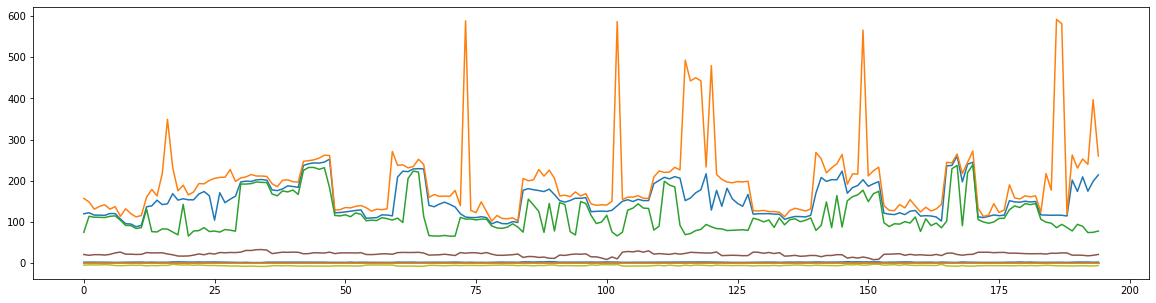

In [11]:
# Plot: Data distribution (combined data)
X_plot = parkinson_df.drop(['status','Serial_No','name'],axis=1)    
plt.subplots(figsize=(20,5))
plt.plot(X_plot)
plt.show()

In [13]:
# Checking the number parkinson case and non parkinson cases

print('N.o of Parkinson Patients -',parkinson_df['status'].isin([1]).sum())
print('N.o of Healthy Patients -',parkinson_df['status'].isin([0]).sum())

N.o of Parkinson Patients - 147
N.o of Healthy Patients - 48


<font color=darkblue>

# Data Set Observations:
   - There are 25 features and 195 data points.
   - The data set Rows is very small and Features are medium/normal size.
   - The dataset is clean to use.
   - There are no zeroes in the datapoints other than Status column which is a Binary Categorical column.
   - spread1 attribute has negative data points, which looks to be a valid data as the minimum and maximum   values are -7.964984 and	-2.434031.
   - From the above Graph,We are seeing the attributes (MDVP:Fo(Hz),MDVP:Fhi(Hz),M)DVP:Flo(Hz) and HNR) are in high scale, so all the attributes are not in the same scale which emphasize to apply standard scaler
   -  There are 147 patients are deducted with Pakinson's Disease among the 195 total records, which says the dataset is biased towards Parkinson case.

# 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations?

In [14]:
X_plot.describe().transpose()

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

In [15]:
# Prints the value below which 25% of the data lies

X_plot.quantile(q=0.25)

MDVP:Fo(Hz)         117.572000
MDVP:Fhi(Hz)        134.862500
MDVP:Flo(Hz)         84.291000
MDVP:Jitter(%)        0.003460
MDVP:Jitter(Abs)      0.000020
MDVP:RAP              0.001660
MDVP:PPQ              0.001860
Jitter:DDP            0.004985
MDVP:Shimmer          0.016505
MDVP:Shimmer(dB)      0.148500
Shimmer:APQ3          0.008245
Shimmer:APQ5          0.009580
MDVP:APQ              0.013080
Shimmer:DDA           0.024735
NHR                   0.005925
HNR                  19.198000
RPDE                  0.421306
DFA                   0.674758
spread1              -6.450096
spread2               0.174351
D2                    2.099125
PPE                   0.137451
Name: 0.25, dtype: float64

<font color=darkblue>

# Observations:
- From the above 1st Quantile below are the observations. 
    - MDVP:Fo(Hz) - Average vocal fundamental frequency for the patients in the 1st Quantile is within 117.572
    - MDVP:Fhi(Hz) - Maximum vocal fundamental frequency for the patients in the 1st Quantile is within 134.8625
    - MDVP:Flo(Hz) - Minimum vocal fundamental frequency for the patients in the 1st Quantile is within 84.291
    - HNR - Two measures of ratio of noise to tonal components in the voice for the patients in the 1st Quantile is within 19.198
    - D2 - Two nonlinear dynamical complexity measures for the patients in the 1st Quantile is within 2.099125

In [16]:
# Prints the value below which 50% of the data lies

X_plot.quantile(q=0.50)

MDVP:Fo(Hz)         148.790000
MDVP:Fhi(Hz)        175.829000
MDVP:Flo(Hz)        104.315000
MDVP:Jitter(%)        0.004940
MDVP:Jitter(Abs)      0.000030
MDVP:RAP              0.002500
MDVP:PPQ              0.002690
Jitter:DDP            0.007490
MDVP:Shimmer          0.022970
MDVP:Shimmer(dB)      0.221000
Shimmer:APQ3          0.012790
Shimmer:APQ5          0.013470
MDVP:APQ              0.018260
Shimmer:DDA           0.038360
NHR                   0.011660
HNR                  22.085000
RPDE                  0.495954
DFA                   0.722254
spread1              -5.720868
spread2               0.218885
D2                    2.361532
PPE                   0.194052
Name: 0.5, dtype: float64

<font color=darkblue>

# Observations:
- From the above 2nd Quantile below are the observations. 
    - MDVP:Fo(Hz) - Average vocal fundamental frequency for the patients in the 2nd Quantile is within 148.97
    - MDVP:Fhi(Hz) - Maximum vocal fundamental frequency for the patients in the 2nd Quantile is within 175.829
    - MDVP:Flo(Hz) - Minimum vocal fundamental frequency for the patients in the 2nd Quantile is within 104.315
    - HNR - Two measures of ratio of noise to tonal components in the voice for the patients in the 2nd Quantile is within 22.085
    - D2 - Two nonlinear dynamical complexity measures for the patients in the 2nd Quantile is within 2.361532

In [17]:
# Prints the value below which 75% of the data lies

X_plot.quantile(q=0.75)

MDVP:Fo(Hz)         182.769000
MDVP:Fhi(Hz)        224.205500
MDVP:Flo(Hz)        140.018500
MDVP:Jitter(%)        0.007365
MDVP:Jitter(Abs)      0.000060
MDVP:RAP              0.003835
MDVP:PPQ              0.003955
Jitter:DDP            0.011505
MDVP:Shimmer          0.037885
MDVP:Shimmer(dB)      0.350000
Shimmer:APQ3          0.020265
Shimmer:APQ5          0.022380
MDVP:APQ              0.029400
Shimmer:DDA           0.060795
NHR                   0.025640
HNR                  25.075500
RPDE                  0.587562
DFA                   0.761881
spread1              -5.046192
spread2               0.279234
D2                    2.636456
PPE                   0.252980
Name: 0.75, dtype: float64

<font color=darkblue>

# Observations:
- From the above 3rd Quantile below are the observations. 
    - MDVP:Fo(Hz) - Average vocal fundamental frequency for the patients in the 3rd Quantile is within 182.769
    - MDVP:Fhi(Hz) - Maximum vocal fundamental frequency for the patients in the 3rd Quantile is within 224.2055
    - MDVP:Flo(Hz) - Minimum vocal fundamental frequency for the patients in the 3rd Quantile is within 140.018
    - HNR - Two measures of ratio of noise to tonal components in the voice for the patients in the 3rd Quantile is within 25.0755
    - D2 - Two nonlinear dynamical complexity measures for the patients in the 3rd Quantile is within 2.636456

# Measure of skewness of  ‘MDVP:Fo(Hz) -Average vocal fundamental frequency’

In [18]:
AvgVocal_mode =X_plot['MDVP:Fo(Hz)'].mode()
AvgVocal_median = X_plot['MDVP:Fo(Hz)'].median()
AvgVocal_mean = X_plot['MDVP:Fo(Hz)'].mean()
print('Mode :',AvgVocal_mode)
print('Median :',AvgVocal_median)
print('Mean:',AvgVocal_mean)
print ('Skewness on MDVP:Fo(Hz) -Average vocal fundamental frequency :',X_plot.skew()['MDVP:Fo(Hz)'])

if(AvgVocal_mean > AvgVocal_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0       88.333
1       91.904
2       95.056
3       95.385
4       95.605
        ...   
190    243.439
191    244.990
192    245.510
193    252.455
194    260.105
Length: 195, dtype: float64
Median : 148.79
Mean: 154.22864102564105
Skewness on MDVP:Fo(Hz) -Average vocal fundamental frequency : 0.5917374636540769
Then the distribution is positively skewed.


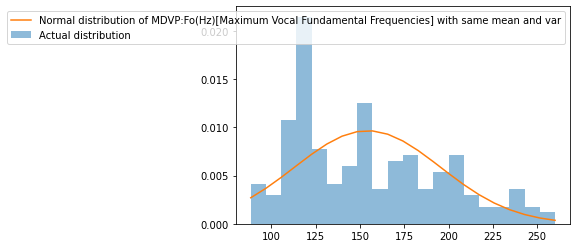

In [42]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(X_plot['MDVP:Fo(Hz)'])
h = sorted(h)
 
_,bins, _ = plt.hist(h, 20, density=1, alpha=0.5,label="Actual distribution")
    
mu, sigma = stats.norm.fit(h)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
best_fit_line = stats.norm.pdf(bins, mu, sigma) 
 
#plot both series on the histogram

plt.plot(bins,best_fit_line,label="Normal distribution of MDVP:Fo(Hz)[Maximum Vocal Fundamental Frequencies] with same mean and var")

plt.legend()

plt.show()

In [20]:
IQR_AvgVocal = X_plot["MDVP:Fo(Hz)"].quantile(0.75) - X_plot["MDVP:Fo(Hz)"].quantile(0.25)

print('IQR_AvgVocal -',IQR_AvgVocal)

high_Wiskers_outlier = X_plot["MDVP:Fo(Hz)"].quantile(0.75) + 1.5*IQR_AvgVocal
print('Higher outliers for Average vocal fundamental frequency >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["MDVP:Fo(Hz)"].quantile(0.25)  - 1.5*IQR_AvgVocal
print('Lower outliers Average vocal fundamental frequency <',low_Wiskers_outlier)

IQR_AvgVocal - 65.197
Higher outliers for Average vocal fundamental frequency > 280.5645
Lower outliers Average vocal fundamental frequency < 19.7765


Text(0.8, 19.7765, 'Lower Outliers')

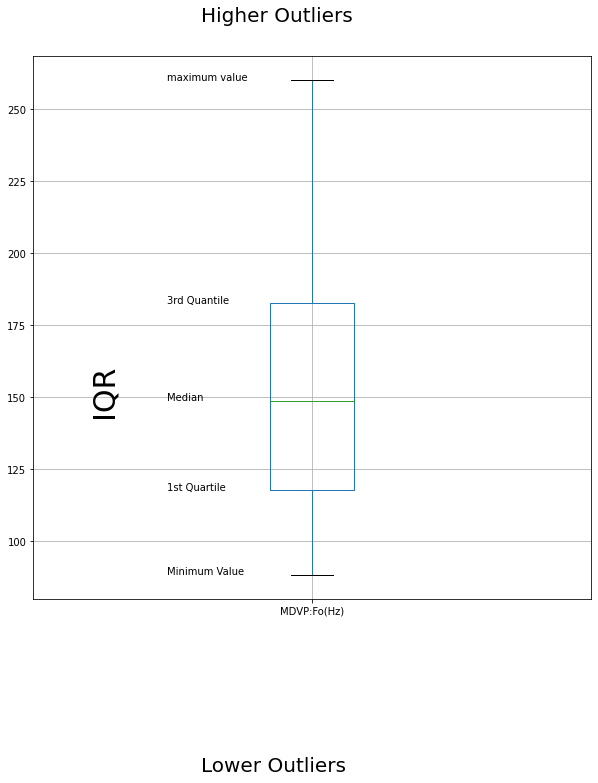

In [21]:
# Box Plot to show the outliers
X_plot.boxplot(column="MDVP:Fo(Hz)",return_type='axes',figsize=(10,10))
plt.text(x=0.74, y=182.769, s="3rd Quantile")
plt.text(x=0.74, y=148.79,  s="Median")
plt.text(x=0.74, y=117.572,  s="1st Quartile")
plt.text(x=0.74, y=88.33,  s="Minimum Value")
plt.text(x=0.74, y=260.105,  s="maximum value")
plt.text(x=0.80, y=280.5645, s="Higher Outliers",size=20)
plt.text(x=0.60, y=145, s="IQR", rotation=90, size=30)
plt.text(x=0.80, y=19.7765, s="Lower Outliers",size=20)

<font color=darkblue>

# Observations on MDVP:Fo(Hz) -Average vocal fundamental frequency
   - Multi Modal Distribution with positive skewness.
   - No Outliers, all the 195 values are within the upper wiskers limit and also no lower outliers.

# Measure of skewness of  ‘MDVP:Fhi(Hz) - Maximum vocal fundamental frequency’

In [33]:
MaxVocal_mode =X_plot['MDVP:Fhi(Hz)'].mode()
MaxVocal_median = X_plot['MDVP:Fhi(Hz)'].median()
MaxVocal_mean = X_plot['MDVP:Fhi(Hz)'].mean()
print('Mode :',MaxVocal_mode)
print('Median :',MaxVocal_median)
print('Mean:',MaxVocal_mean)
print ('Skewness on MDVP:Fhi(Hz) -Maximum vocal fundamental frequency :',X_plot.skew()['MDVP:Fhi(Hz)'])

if(MaxVocal_mean > MaxVocal_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0      102.145
1      102.305
2      107.715
3      108.664
4      110.019
        ...   
190    565.740
191    581.289
192    586.567
193    588.518
194    592.030
Length: 195, dtype: float64
Median : 175.829
Mean: 197.104917948718
Skewness on MDVP:Fhi(Hz) -Maximum vocal fundamental frequency : 2.5421459975883964
Then the distribution is positively skewed.


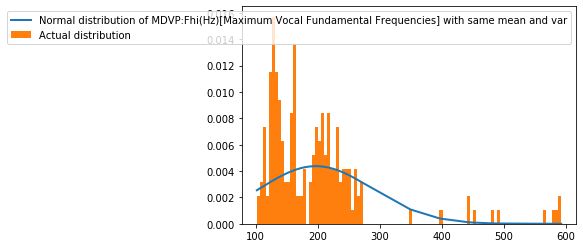

In [21]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(X_plot['MDVP:Fhi(Hz)'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of MDVP:Fhi(Hz)[Maximum Vocal Fundamental Frequencies] with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [22]:
IQR_MaxVocal = X_plot["MDVP:Fhi(Hz)"].quantile(0.75) - X_plot["MDVP:Fhi(Hz)"].quantile(0.25)

print('IQR_MaxVocal -',IQR_MaxVocal)

high_Wiskers_outlier = X_plot["MDVP:Fhi(Hz)"].quantile(0.75) + 1.5*IQR_MaxVocal
print('Higher outliers for Maximum vocal fundamental frequency >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["MDVP:Fhi(Hz)"].quantile(0.25)  - 1.5*IQR_MaxVocal
print('Lower outliers Maximum vocal fundamental frequency <',low_Wiskers_outlier)

IQR_MaxVocal - 89.34299999999999
Higher outliers for Maximum vocal fundamental frequency > 358.22
Lower outliers Maximum vocal fundamental frequency < 0.8480000000000132


Text(0.8, 0.848, 'Lower Outliers')

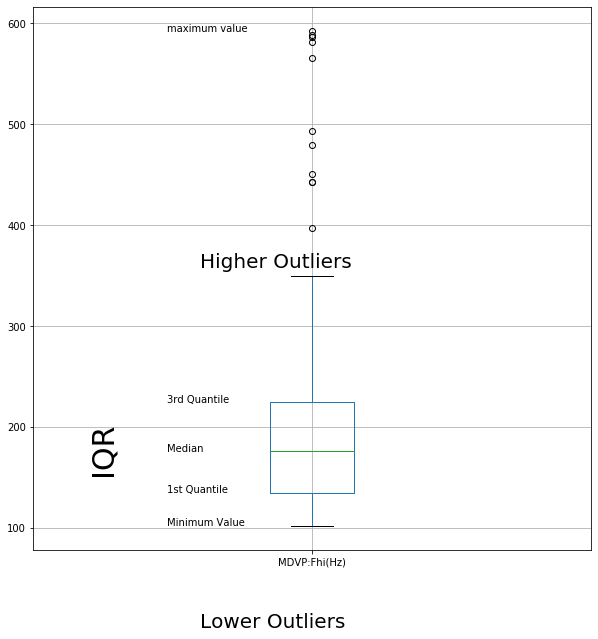

In [23]:
# Box Plot to show the outliers
X_plot.boxplot(column="MDVP:Fhi(Hz)",return_type='axes',figsize=(10,10))
plt.text(x=0.74, y=224.2055, s="3rd Quantile")
plt.text(x=0.74, y=175.829,  s="Median")
plt.text(x=0.74, y=134.8625,  s="1st Quantile")
plt.text(x=0.74, y=102.145,  s="Minimum Value")
plt.text(x=0.74, y=592.03,  s="maximum value")
plt.text(x=0.80, y=358.22, s="Higher Outliers",size=20)
plt.text(x=0.60, y=158, s="IQR", rotation=90, size=30)
plt.text(x=0.80, y=0.8480, s="Lower Outliers",size=20)

<font color=darkblue>

# Observations on MDVP:Fo(Hz) -Maximum vocal fundamental frequency
   - Multi Modal Distribution with positive skewness.
   - Seeing Outliers above the Higher Wiskers Limit.

# Measure of skewness of  ‘MDVP:Flo(Hz) - Minimum vocal fundamental frequency’

In [25]:
MinVocal_mode =X_plot['MDVP:Flo(Hz)'].mode()
MinVocal_median = X_plot['MDVP:Flo(Hz)'].median()
MinVocal_mean = X_plot['MDVP:Flo(Hz)'].mean()
print('Mode :',MinVocal_mode)
print('Median :',MinVocal_median)
print('Mean:',MinVocal_mean)
print ('Skewness on MDVP:Flo(Hz) -Minimum vocal fundamental frequency :',X_plot.skew()['MDVP:Flo(Hz)'])

if(MinVocal_mean > MinVocal_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0       65.476
1       65.750
2       65.782
3       65.809
4       66.004
        ...   
190    231.848
191    232.435
192    232.483
193    237.303
194    239.170
Length: 195, dtype: float64
Median : 104.315
Mean: 116.32463076923077
Skewness on MDVP:Flo(Hz) -Minimum vocal fundamental frequency : 1.2173504486278097
Then the distribution is positively skewed.


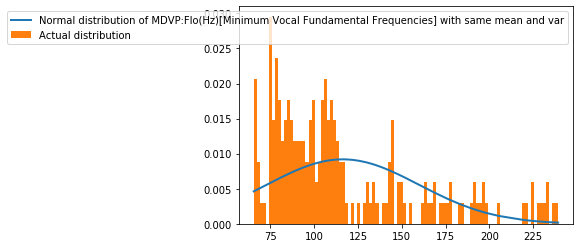

In [26]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(X_plot['MDVP:Flo(Hz)'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of MDVP:Flo(Hz)[Minimum Vocal Fundamental Frequencies] with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [28]:
IQR_MinVocal = X_plot["MDVP:Flo(Hz)"].quantile(0.75) - X_plot["MDVP:Flo(Hz)"].quantile(0.25)

print('IQR_MinVocal -',IQR_MinVocal)

high_Wiskers_outlier = X_plot["MDVP:Flo(Hz)"].quantile(0.75) + 1.5*IQR_MinVocal
print('Higher outliers for Minimum vocal fundamental frequency >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["MDVP:Flo(Hz)"].quantile(0.25)  - 1.5*IQR_MinVocal
print('Lower outliers Minimum vocal fundamental frequency <',low_Wiskers_outlier)

IQR_MinVocal - 55.72750000000002
Higher outliers for Minimum vocal fundamental frequency > 223.60975000000005
Lower outliers Minimum vocal fundamental frequency < 0.6997499999999661


Text(0.8, 0.69974, 'Lower Outliers')

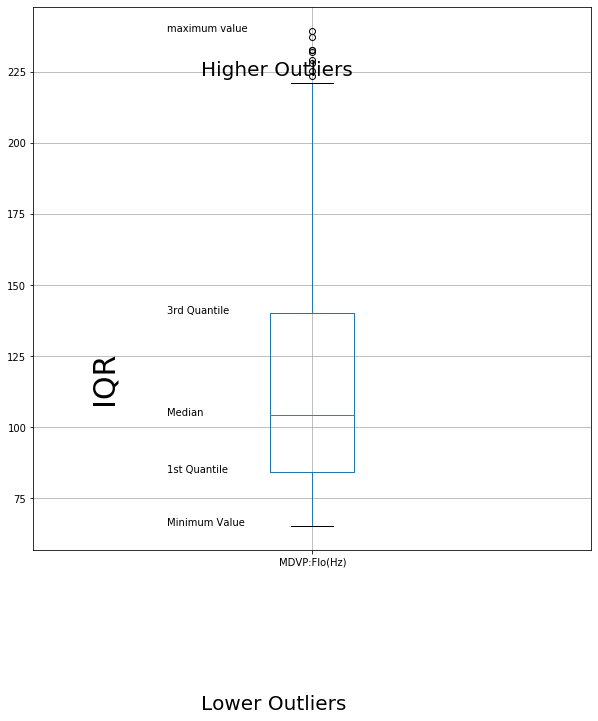

In [31]:
# Box Plot to show the outliers
X_plot.boxplot(column="MDVP:Flo(Hz)",return_type='axes',figsize=(10,10))
plt.text(x=0.74, y=140.0185, s="3rd Quantile")
plt.text(x=0.74, y=104.315,  s="Median")
plt.text(x=0.74, y=84.291,  s="1st Quantile")
plt.text(x=0.74, y=65.476,  s="Minimum Value")
plt.text(x=0.74, y=239.17,  s="maximum value")
plt.text(x=0.80, y=223.609, s="Higher Outliers",size=20)
plt.text(x=0.60, y= 110, s="IQR", rotation=90, size=30)
plt.text(x=0.80, y=0.69974, s="Lower Outliers",size=20)

<font color=darkblue>

# Observations on MDVP:Fo(Hz) -Maximum vocal fundamental frequency
   - Multi Modal Distribution with positive skewness.
   - Seeing Outliers above the Higher Wiskers Limit.

# Checking Outliers  and Skewness on MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several  measures of variation in fundamental frequency

# Measure of Outliers  and Skewness for MDVP:Jitter(%) - Several  measures of variation in fundamental frequency

In [44]:
jitterPer_mode =X_plot['MDVP:Jitter(%)'].mode()
jitterPer_median = X_plot['MDVP:Jitter(%)'].median()
jitterPer_mean = X_plot['MDVP:Jitter(%)'].mean()
print('Mode :',jitterPer_mode)
print('Median :',jitterPer_median)
print('Mean:',jitterPer_mean)
print ('Skewness on MDVP:Jitter(%)',X_plot.skew()['MDVP:Jitter(%)'])

if(jitterPer_mean > jitterPer_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0    0.00369
1    0.00694
2    0.00742
dtype: float64
Median : 0.00494
Mean: 0.006220461538461542
Skewness on MDVP:Jitter(%) 3.0849462014441755
Then the distribution is positively skewed.


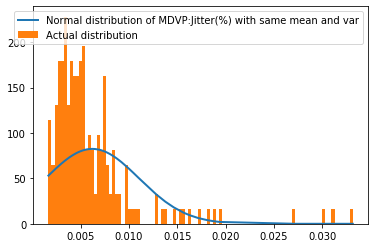

In [42]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(X_plot['MDVP:Jitter(%)'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of MDVP:Jitter(%) with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [43]:
IQR_JitterPer = X_plot["MDVP:Jitter(%)"].quantile(0.75) - X_plot["MDVP:Jitter(%)"].quantile(0.25)

print('IQR_JitterPercent -',IQR_JitterPer)

high_Wiskers_outlier = X_plot["MDVP:Jitter(%)"].quantile(0.75) + 1.5*IQR_JitterPer
print('Higher outliers for IQR_JitterPer >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["MDVP:Jitter(%)"].quantile(0.25)  - 1.5*IQR_JitterPer
print('Lower outliers for IQR_JitterPer <',low_Wiskers_outlier)

IQR_JitterPercent - 0.003905
Higher outliers for IQR_JitterPer > 0.0132225
Lower outliers for IQR_JitterPer < -0.0023975


# Measure of Outliers  and Skewness for MDVP:Jitter(Abs) - Several  measures of variation in fundamental frequency

In [45]:
jitterAbs_mode =X_plot['MDVP:Jitter(Abs)'].mode()
jitterAbs_median = X_plot['MDVP:Jitter(Abs)'].median()
jitterAbs_mean = X_plot['MDVP:Jitter(Abs)'].mean()
print('Mode :',jitterAbs_mode)
print('Median :',jitterAbs_median)
print('Mean:',jitterAbs_mean)
print ('Skewness on MDVP:Jitter(Abs)',X_plot.skew()['MDVP:Jitter(Abs)'])

if(jitterAbs_mean > jitterAbs_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0    0.00003
dtype: float64
Median : 3e-05
Mean: 4.395897435897438e-05
Skewness on MDVP:Jitter(Abs) 2.649071416525735
Then the distribution is positively skewed.


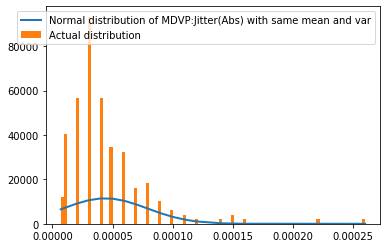

In [48]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(X_plot['MDVP:Jitter(Abs)'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of MDVP:Jitter(Abs) with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [49]:
IQR_JitterAbs = X_plot["MDVP:Jitter(Abs)"].quantile(0.75) - X_plot["MDVP:Jitter(Abs)"].quantile(0.25)

print('IQR_JitterAbs -',IQR_JitterAbs)

high_Wiskers_outlier = X_plot["MDVP:Jitter(Abs)"].quantile(0.75) + 1.5*IQR_JitterAbs
print('Higher outliers for IQR_JitterAbs >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["MDVP:Jitter(Abs)"].quantile(0.25)  - 1.5*IQR_JitterAbs
print('Lower outliers for IQR_JitterAbs <',low_Wiskers_outlier)

IQR_JitterAbs - 3.9999999999999996e-05
Higher outliers for IQR_JitterAbs > 0.00011999999999999999
Lower outliers for IQR_JitterAbs < -3.9999999999999996e-05


# Measure of Outliers  and Skewness for MDVP:RAP - Several  measures of variation in fundamental frequency

In [50]:
rap_mode =X_plot['MDVP:RAP'].mode()
rap_median = X_plot['MDVP:RAP'].median()
rap_mean = X_plot['MDVP:RAP'].mean()
print('Mode :',rap_mode)
print('Median :',rap_median)
print('Mean:',rap_mean)
print ('Skewness on MDVP:RAP',X_plot.skew()['MDVP:RAP'])

if(rap_mean > rap_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0    0.00169
dtype: float64
Median : 0.0025
Mean: 0.0033064102564102577
Skewness on MDVP:RAP 3.3607084504805513
Then the distribution is positively skewed.


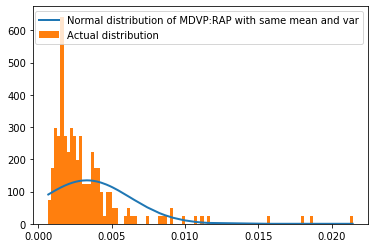

In [51]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(X_plot['MDVP:RAP'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of MDVP:RAP with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [52]:
IQR_Rap = X_plot["MDVP:RAP"].quantile(0.75) - X_plot["MDVP:RAP"].quantile(0.25)

print('IQR_Rap -',IQR_Rap)

high_Wiskers_outlier = X_plot["MDVP:RAP"].quantile(0.75) + 1.5*IQR_Rap
print('Higher outliers for MDVP:RAP >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["MDVP:RAP"].quantile(0.25)  - 1.5*IQR_Rap
print('Lower outliers for MDVP:RAP <',low_Wiskers_outlier)

IQR_Rap - 0.002175
Higher outliers for MDVP:RAP > 0.0070975
Lower outliers for MDVP:RAP < -0.0016024999999999995


# Measure of Outliers  and Skewness for MDVP:PPQ - Several  measures of variation in fundamental frequency

In [53]:
ppq_mode =X_plot['MDVP:PPQ'].mode()
ppq_median = X_plot['MDVP:PPQ'].median()
ppq_mean = X_plot['MDVP:PPQ'].mean()
print('Mode :',ppq_mode)
print('Median :',ppq_median)
print('Mean:',ppq_mean)
print ('Skewness on MDVP:PPQ',X_plot.skew()['MDVP:PPQ'])

if(ppq_mean > ppq_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0    0.00332
dtype: float64
Median : 0.00269
Mean: 0.0034463589743589746
Skewness on MDVP:PPQ 3.0738924578885194
Then the distribution is positively skewed.


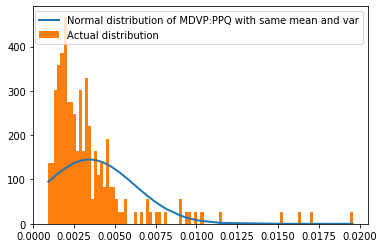

In [54]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(X_plot['MDVP:PPQ'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of MDVP:PPQ with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [55]:
IQR_PPQ = X_plot["MDVP:PPQ"].quantile(0.75) - X_plot["MDVP:PPQ"].quantile(0.25)

print('IQR_PPQ -',IQR_PPQ)

high_Wiskers_outlier = X_plot["MDVP:PPQ"].quantile(0.75) + 1.5*IQR_PPQ
print('Higher outliers for MDVP:PPQ >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["MDVP:PPQ"].quantile(0.25)  - 1.5*IQR_PPQ
print('Lower outliers for MDVP:PPQ <',low_Wiskers_outlier)

IQR_PPQ - 0.002095
Higher outliers for MDVP:PPQ > 0.0070975000000000005
Lower outliers for MDVP:PPQ < -0.0012825000000000002


# Measure of Outliers  and Skewness for Jitter:DDP - Several  measures of variation in fundamental frequency

In [58]:
DDP_mode =X_plot['Jitter:DDP'].mode()
DDP_median = X_plot['Jitter:DDP'].median()
DDP_mean = X_plot['Jitter:DDP'].mean()
print('Mode :',DDP_mode)
print('Median :',DDP_median)
print('Mean:',DDP_mean)
print ('Skewness on Jitter:DDP',X_plot.skew()['Jitter:DDP'])

if(DDP_mean > DDP_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0    0.00507
dtype: float64
Median : 0.007490000000000002
Mean: 0.009919948717948712
Skewness on Jitter:DDP 3.362058447885721
Then the distribution is positively skewed.


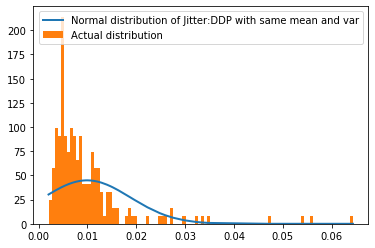

In [59]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(X_plot['Jitter:DDP'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of Jitter:DDP with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [61]:
IQR_DDP = X_plot["Jitter:DDP"].quantile(0.75) - X_plot["Jitter:DDP"].quantile(0.25)

print('IQR_DDP -',IQR_DDP)

high_Wiskers_outlier = X_plot["Jitter:DDP"].quantile(0.75) + 1.5*IQR_DDP
print('Higher outliers for Jitter:DDP >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["Jitter:DDP"].quantile(0.25)  - 1.5*IQR_DDP
print('Lower outliers for Jitter:DDP <',low_Wiskers_outlier)

IQR_DDP - 0.0065200000000000015
Higher outliers for Jitter:DDP > 0.021285000000000005
Lower outliers for Jitter:DDP < -0.004795000000000002


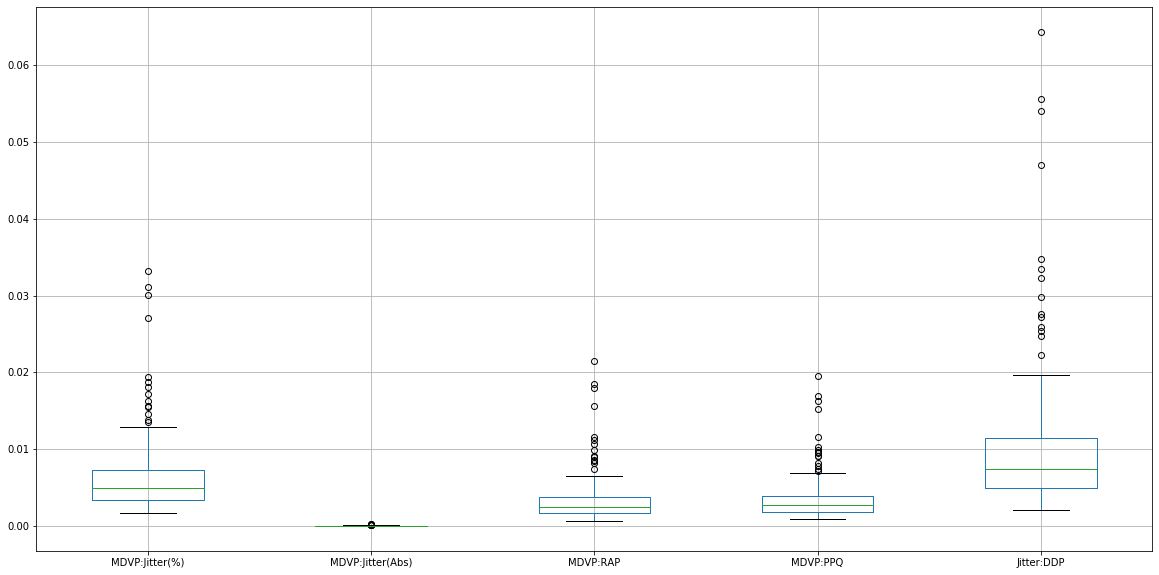

In [38]:
X_plot.boxplot(column=['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP','MDVP:PPQ','Jitter:DDP'],figsize = (20,10))

<font color=darkblue>

# Observations from the Univariate Analysis on MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

   - Except MDVP:Jitter(%) all the measures of variation in fundamental frequency are unimodal where as MDVP:Jitter(%)looks to be a Bimodal.
   - All the Measure of Variation in fundamental frequency is positively skewed
   - Seeing all the Measures of variation in fundamental frequency has outliers exceeding the Higher Wiskers limit.

# Checking Outliers  and Skewness on MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5 ,   MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

# Measure of Outliers  and Skewness for MDVP:Shimmer - Several measures of variation in amplitude

In [62]:
shimmer_mode =X_plot['MDVP:Shimmer'].mode()
shimmer_median = X_plot['MDVP:Shimmer'].median()
shimmer_mean = X_plot['MDVP:Shimmer'].mean()
print('Mode :',shimmer_mode)
print('Median :',shimmer_median)
print('Mean:',shimmer_mean)
print ('Skewness on MDVP:Shimmer',X_plot.skew()['MDVP:Shimmer'])

if(shimmer_mean > shimmer_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0    0.01450
1    0.01503
2    0.01608
3    0.01725
4    0.02293
5    0.02448
6    0.03273
dtype: float64
Median : 0.02297
Mean: 0.0297091282051282
Skewness on MDVP:Shimmer 1.666480410155968
Then the distribution is positively skewed.


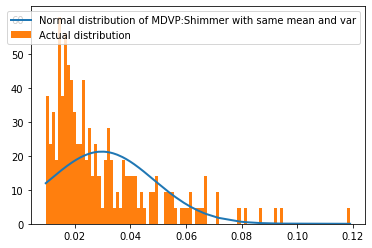

In [63]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(X_plot['MDVP:Shimmer'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of MDVP:Shimmer with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [64]:
IQR_shimmer = X_plot["MDVP:Shimmer"].quantile(0.75) - X_plot["MDVP:Shimmer"].quantile(0.25)

print('IQR_shimmer -',IQR_shimmer)

high_Wiskers_outlier = X_plot["MDVP:Shimmer"].quantile(0.75) + 1.5*IQR_shimmer
print('Higher outliers for MDVP:Shimmer >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["MDVP:Shimmer"].quantile(0.25)  - 1.5*IQR_shimmer
print('Lower outliers for MDVP:Shimmer <',low_Wiskers_outlier)

IQR_shimmer - 0.021380000000000003
Higher outliers for MDVP:Shimmer > 0.069955
Lower outliers for MDVP:Shimmer < -0.015565000000000002


# Measure of Outliers  and Skewness for MDVP:Shimmer(dB) - Several measures of variation in amplitude.

In [70]:
shimmer_db_mode = X_plot['MDVP:Shimmer(dB)'].mode()
shimmer_db_mean = X_plot['MDVP:Shimmer(dB)'].mean()
shimmer_db_median = X_plot['MDVP:Shimmer(dB)'].median()

print('Mode:',shimmer_db_mode)
print('Mean:',shimmer_db_mean)
print('Median:',shimmer_db_median)
print ('Skewness on MDVP:Shimmer(dB)',X_plot.skew()['MDVP:Shimmer(dB)'])
if(shimmer_db_mean > shimmer_db_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode: 0    0.154
dtype: float64
Mean: 0.2822512820512821
Median: 0.221
Skewness on MDVP:Shimmer(dB) 1.9993886390861275
Then the distribution is positively skewed.


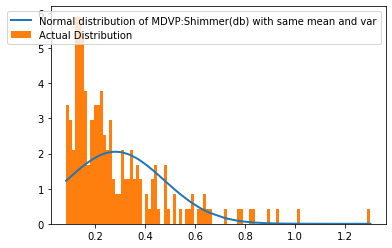

In [73]:
h = np.asarray(X_plot['MDVP:Shimmer(dB)'])
h = sorted(h)

fit = stats.norm.pdf(h,np.mean(h),np.std(h))

plt.plot(h,fit,linewidth =2,label="Normal distribution of MDVP:Shimmer(dB) with same mean and var")
plt.hist(h,normed=True,bins=100,label="Actual Distribution")
plt.legend()
plt.show()

In [75]:
IQR_shimmer_db = X_plot["MDVP:Shimmer(dB)"].quantile(0.75) - X_plot["MDVP:Shimmer(dB)"].quantile(0.25)

print('IQR_shimmer_db -',IQR_shimmer_db)

high_Wiskers_outlier = X_plot["MDVP:Shimmer(dB)"].quantile(0.75) + 1.5*IQR_shimmer_db
print('Higher outliers for MDVP:Shimmer(dB) >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["MDVP:Shimmer(dB)"].quantile(0.25)  - 1.5*IQR_shimmer_db
print('Lower outliers for MDVP:Shimmer(dB) <',low_Wiskers_outlier)

IQR_shimmer_db - 0.20149999999999996
Higher outliers for MDVP:Shimmer(dB) > 0.6522499999999999
Lower outliers for MDVP:Shimmer(dB) < -0.1537499999999999


# Measure of Outliers  and Skewness for Shimmer:APQ3 - Several measures of variation in amplitude.

In [76]:
shimmer_apq3_mode = X_plot['Shimmer:APQ3'].mode()
shimmer_apq3_mean = X_plot['Shimmer:APQ3'].mean()
shimmer_apq3_median = X_plot['Shimmer:APQ3'].median()

print('Mode:',shimmer_apq3_mode)
print('Mean:',shimmer_apq3_mean)
print('Median:',shimmer_apq3_median)
print ('Skewness on Shimmer:APQ3',X_plot.skew()['Shimmer:APQ3'])
if(shimmer_apq3_mean > shimmer_apq3_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode: 0     0.00469
1     0.00522
2     0.00633
3     0.00728
4     0.00769
5     0.00829
6     0.01277
7     0.01284
8     0.01441
9     0.01484
10    0.01579
dtype: float64
Mean: 0.015664153846153845
Median: 0.01279
Skewness on Shimmer:APQ3 1.5805763798815684
Then the distribution is positively skewed.


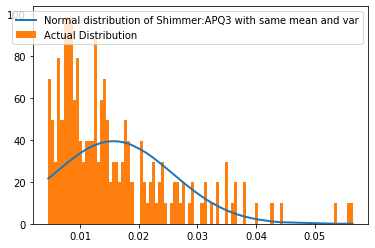

In [78]:
h = np.asarray(X_plot['Shimmer:APQ3'])
h = sorted(h)

fit = stats.norm.pdf(h,np.mean(h),np.std(h))

plt.plot(h,fit,linewidth =2,label="Normal distribution of Shimmer:APQ3 with same mean and var")
plt.hist(h,normed=True,bins=100,label="Actual Distribution")
plt.legend()
plt.show()

In [82]:
IQR_shimmer_APQ3 = X_plot["Shimmer:APQ3"].quantile(0.75) - X_plot["Shimmer:APQ3"].quantile(0.25)

print('IQR_shimmer_APQ3 -',IQR_shimmer_APQ3)

high_Wiskers_outlier = X_plot["Shimmer:APQ3"].quantile(0.75) + 1.5*IQR_shimmer_APQ3
print('Higher outliers for Shimmer:APQ3 >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["Shimmer:APQ3"].quantile(0.25)  - 1.5*IQR_shimmer_APQ3
print('Lower outliers for Shimmer:APQ3 <',low_Wiskers_outlier)

IQR_shimmer_APQ3 - 0.012019999999999998
Higher outliers for Shimmer:APQ3 > 0.038294999999999996
Lower outliers for Shimmer:APQ3 < -0.009784999999999997


# Measure of Outliers  and Skewness for Shimmer:APQ5 - Several measures of variation in amplitude.

In [83]:
shimmer_apq5_mode = X_plot['Shimmer:APQ5'].mode()
shimmer_apq5_mean = X_plot['Shimmer:APQ5'].mean()
shimmer_apq5_median = X_plot['Shimmer:APQ5'].median()

print('Mode:',shimmer_apq5_mode)
print('Mean:',shimmer_apq5_mean)
print('Median:',shimmer_apq5_median)
print ('Skewness on Shimmer:APQ5',X_plot.skew()['Shimmer:APQ5'])
if(shimmer_apq5_mean > shimmer_apq5_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode: 0    0.00747
1    0.00972
2    0.01024
3    0.01144
4    0.01160
5    0.01219
dtype: float64
Mean: 0.017878256410256418
Median: 0.01347
Skewness on Shimmer:APQ5 1.7986970665376174
Then the distribution is positively skewed.


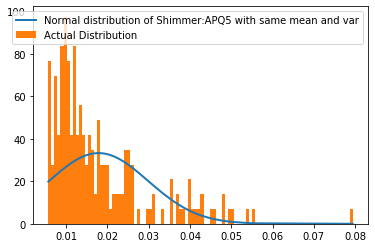

In [84]:
h = np.asarray(X_plot['Shimmer:APQ5'])
h = sorted(h)

fit = stats.norm.pdf(h,np.mean(h),np.std(h))

plt.plot(h,fit,linewidth =2,label="Normal distribution of Shimmer:APQ5 with same mean and var")
plt.hist(h,normed=True,bins=100,label="Actual Distribution")
plt.legend()
plt.show()

In [85]:
IQR_shimmer_APQ5 = X_plot["Shimmer:APQ5"].quantile(0.75) - X_plot["Shimmer:APQ5"].quantile(0.25)

print('IQR_shimmer_APQ5 -',IQR_shimmer_APQ5)

high_Wiskers_outlier = X_plot["Shimmer:APQ5"].quantile(0.75) + 1.5*IQR_shimmer_APQ5
print('Higher outliers for Shimmer:APQ5 >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["Shimmer:APQ5"].quantile(0.25)  - 1.5*IQR_shimmer_APQ5
print('Lower outliers for Shimmer:APQ5 <',low_Wiskers_outlier)

IQR_shimmer_APQ5 - 0.0128
Higher outliers for Shimmer:APQ5 > 0.041580000000000006
Lower outliers for Shimmer:APQ5 < -0.009620000000000002


# Measure of Outliers  and Skewness for MDVP:APQ - Several measures of variation in amplitude.

In [87]:
APQ_mode = X_plot['MDVP:APQ'].mode()
APQ_mean = X_plot['MDVP:APQ'].mean()
APQ_median = X_plot['MDVP:APQ'].median()

print('Mode:',APQ_mode)
print('Mean:',APQ_mean)
print('Median:',APQ_median)
print ('Skewness on MDVP:APQ',X_plot.skew()['MDVP:APQ'])
if(APQ_mean > APQ_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode: 0    0.00903
1    0.01133
2    0.01140
3    0.01234
4    0.01491
5    0.03772
dtype: float64
Mean: 0.024081487179487184
Median: 0.01826
Skewness on MDVP:APQ 2.6180465022154236
Then the distribution is positively skewed.


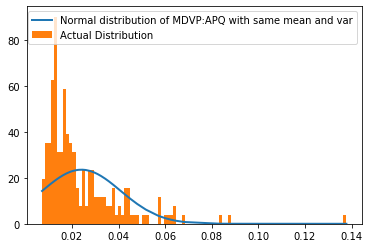

In [90]:
h = np.asarray(X_plot['MDVP:APQ'])
h = sorted(h)

fit = stats.norm.pdf(h,np.mean(h),np.std(h))

plt.plot(h,fit,linewidth =2,label="Normal distribution of MDVP:APQ with same mean and var")
plt.hist(h,normed=True,bins=100,label="Actual Distribution")
plt.legend()
plt.show()

In [91]:
IQR_APQ = X_plot["MDVP:APQ"].quantile(0.75) - X_plot["MDVP:APQ"].quantile(0.25)

print('IQR_APQ -',IQR_APQ)

high_Wiskers_outlier = X_plot["MDVP:APQ"].quantile(0.75) + 1.5*IQR_APQ
print('Higher outliers for MDVP:APQ >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["MDVP:APQ"].quantile(0.25)  - 1.5*IQR_APQ
print('Lower outliers for MDVP:APQ <',low_Wiskers_outlier)

IQR_APQ - 0.016320000000000005
Higher outliers for MDVP:APQ > 0.05388000000000001
Lower outliers for MDVP:APQ < -0.01140000000000001


# Measure of Outliers  and Skewness for Shimmer:DDA - Several measures of variation in amplitude.

In [92]:
Shimmer_DDA_mode = X_plot['Shimmer:DDA'].mode()
Shimmer_DDA_mean = X_plot['Shimmer:DDA'].mean()
Shimmer_DDA_median = X_plot['Shimmer:DDA'].median()

print('Mode:',Shimmer_DDA_mode)
print('Mean:',Shimmer_DDA_mean)
print('Median:',Shimmer_DDA_median)
print ('Skewness on Shimmer:DDA',X_plot.skew()['Shimmer:DDA'])
if(Shimmer_DDA_mean > Shimmer_DDA_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode: 0    0.01567
1    0.01898
2    0.02184
3    0.03831
4    0.04451
5    0.04736
dtype: float64
Mean: 0.04699261538461537
Median: 0.038360000000000005
Skewness on Shimmer:DDA 1.5806179936782245
Then the distribution is positively skewed.


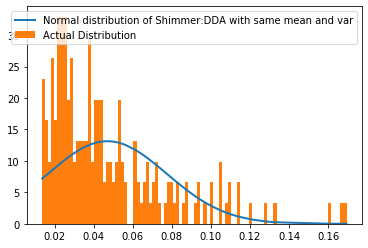

In [93]:
h = np.asarray(X_plot['Shimmer:DDA'])
h = sorted(h)

fit = stats.norm.pdf(h,np.mean(h),np.std(h))

plt.plot(h,fit,linewidth =2,label="Normal distribution of Shimmer:DDA with same mean and var")
plt.hist(h,normed=True,bins=100,label="Actual Distribution")
plt.legend()
plt.show()

In [94]:
IQR_DDA = X_plot["Shimmer:DDA"].quantile(0.75) - X_plot["Shimmer:DDA"].quantile(0.25)

print('IQR_DDA -',IQR_DDA)

high_Wiskers_outlier = X_plot["Shimmer:DDA"].quantile(0.75) + 1.5*IQR_DDA
print('Higher outliers for Shimmer:DDA >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["Shimmer:DDA"].quantile(0.25)  - 1.5*IQR_DDA
print('Lower outliers for Shimmer:DDA <',low_Wiskers_outlier)

IQR_DDA - 0.03606000000000001
Higher outliers for Shimmer:DDA > 0.11488500000000001
Lower outliers for Shimmer:DDA < -0.029355000000000013


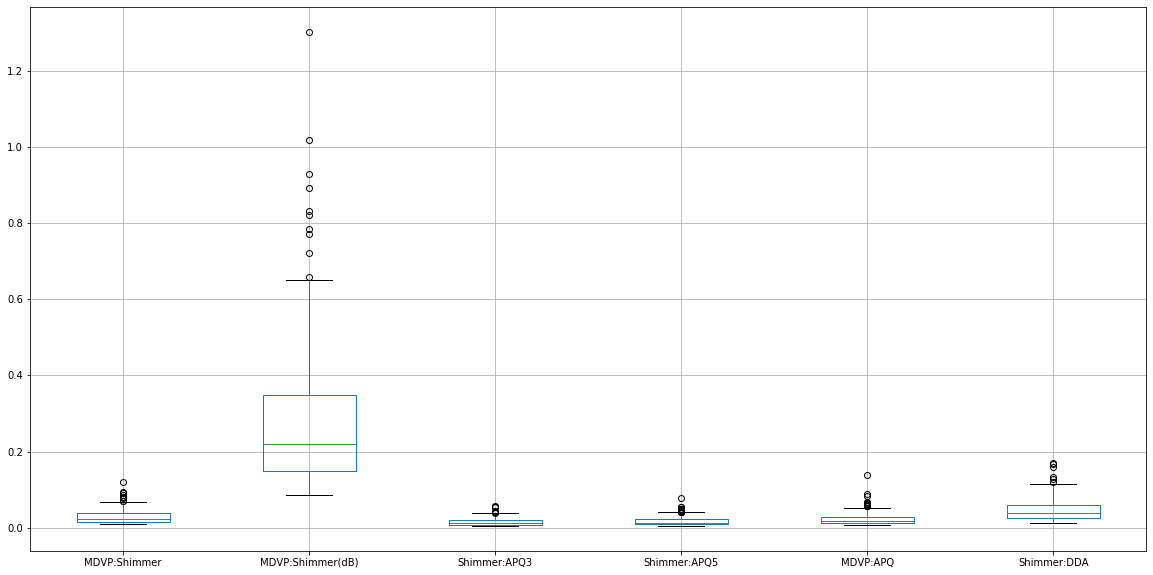

In [109]:
X_plot.boxplot(column=['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'],figsize = (20,10))

<font color=darkblue>

# Observations from the Univariate Analysis on MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

   - Except MDVP:Shimmer(dB) all the measures of variation in amplitude are multimodal where as MDVP:Shimmer(dB)looks to be a unimodal attribute.
   - All the Measure of Variation in fundamental frequency is positively skewed
   - Seeing all the Measures of variation in amplitude has outliers exceeding the Higher Wiskers limit.

# Checking Outliers  and Skewness on NHR,HNR - Two measures of ratio of noise to tonal components in the voice

In [102]:
NHR_mode = X_plot['NHR'].mode()
NHR_mean = X_plot['NHR'].mean()
NHR_median = X_plot['NHR'].median()

print('Mode:',NHR_mode)
print('Mean:',NHR_mean)
print('Median:',NHR_median)
print ('Skewness on NHR',X_plot.skew()['NHR'])
if(NHR_mean > NHR_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode: 0    0.00231
1    0.00340
2    0.00420
3    0.00476
4    0.00479
5    0.00620
6    0.00681
7    0.00839
8    0.01049
9    0.07223
dtype: float64
Mean: 0.024847076923076923
Median: 0.01166
Skewness on NHR 4.220709129139058
Then the distribution is positively skewed.


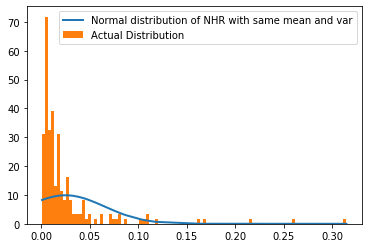

In [103]:
h = np.asarray(X_plot['NHR'])
h = sorted(h)

fit = stats.norm.pdf(h,np.mean(h),np.std(h))

plt.plot(h,fit,linewidth =2,label="Normal distribution of NHR with same mean and var")
plt.hist(h,normed=True,bins=100,label="Actual Distribution")
plt.legend()
plt.show()

In [105]:
IQR_NHR = X_plot["NHR"].quantile(0.75) - X_plot["NHR"].quantile(0.25)

print('IQR_NHR -',IQR_NHR)

high_Wiskers_outlier = X_plot["NHR"].quantile(0.75) + 1.5*IQR_NHR
print('Higher outliers for NHR >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["NHR"].quantile(0.25)  - 1.5*IQR_NHR
print('Lower outliers for NHR <',low_Wiskers_outlier)

IQR_NHR - 0.019715
Higher outliers for NHR > 0.0552125
Lower outliers for NHR < -0.023647500000000002


In [106]:
HNR_mode = X_plot['HNR'].mode()
HNR_mean = X_plot['HNR'].mean()
HNR_median = X_plot['HNR'].median()

print('Mode:',HNR_mode)
print('Mean:',HNR_mean)
print('Median:',HNR_median)
print ('Skewness on HNR',X_plot.skew()['HNR'])
if(HNR_mean > HNR_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode: 0       8.441
1       8.867
2       9.449
3      10.489
4      11.744
        ...  
190    30.775
191    30.940
192    31.732
193    32.684
194    33.047
Length: 195, dtype: float64
Mean: 21.885974358974366
Median: 22.085
Skewness on HNR -0.5143174975652137
Then the distribution is negatively skewed.


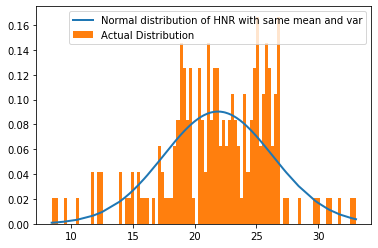

In [107]:
h = np.asarray(X_plot['HNR'])
h = sorted(h)

fit = stats.norm.pdf(h,np.mean(h),np.std(h))

plt.plot(h,fit,linewidth =2,label="Normal distribution of HNR with same mean and var")
plt.hist(h,normed=True,bins=100,label="Actual Distribution")
plt.legend()
plt.show()

In [108]:
IQR_HNR = X_plot["HNR"].quantile(0.75) - X_plot["HNR"].quantile(0.25)

print('IQR_HNR -',IQR_HNR)

high_Wiskers_outlier = X_plot["HNR"].quantile(0.75) + 1.5*IQR_HNR
print('Higher outliers for HNR >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["HNR"].quantile(0.25)  - 1.5*IQR_HNR
print('Lower outliers for HNR <',low_Wiskers_outlier)

IQR_HNR - 5.877499999999998
Higher outliers for HNR > 33.891749999999995
Lower outliers for HNR < 10.381750000000004


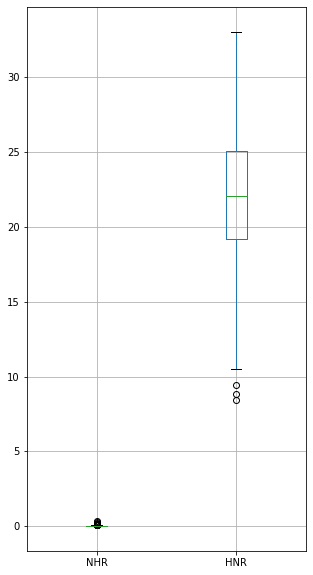

In [111]:
X_plot.boxplot(column=['NHR', 'HNR'],figsize = (5,10))

<font color=darkblue>

# Observations from the Univariate Analysis on NHR,HNR - Two measures of ratio of noise to tonal components in the voice

   - Two Measures of ratio of noise to tonal components in the voice is multi modal.
   - NHR is positively skewed and HNR is negatively Skewed
   - Seeing HNR tonal component has values below the lower wiskers limit.
   - Eventhough both measures the tonal components in voice, both are in different scale.

# Checking Outliers  and Skewness on RPDE,D2 - Two nonlinear dynamical complexity measures

In [14]:
RPDE_mode = X_plot['RPDE'].mode()
RPDE_mean = X_plot['RPDE'].mean()
RPDE_median = X_plot['RPDE'].median()

print('Mode:',RPDE_mode)
print('Mean:',RPDE_mean)
print('Median:',RPDE_median)
print ('Skewness on RPDE',X_plot.skew()['RPDE'])
if(RPDE_mean > RPDE_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode: 0      0.256570
1      0.263654
2      0.276850
3      0.296888
4      0.305062
         ...   
190    0.665318
191    0.671299
192    0.671378
193    0.677131
194    0.685151
Length: 195, dtype: float64
Mean: 0.4985355384615386
Median: 0.495954
Skewness on RPDE -0.14340241379822016
Then the distribution is positively skewed.


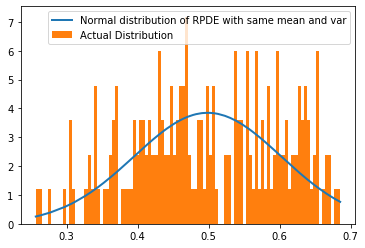

In [15]:
h = np.asarray(X_plot['RPDE'])
h = sorted(h)

fit = stats.norm.pdf(h,np.mean(h),np.std(h))

plt.plot(h,fit,linewidth =2,label="Normal distribution of RPDE with same mean and var")
plt.hist(h,normed=True,bins=100,label="Actual Distribution")
plt.legend()
plt.show()

In [16]:
IQR_RPDE = X_plot["RPDE"].quantile(0.75) - X_plot["RPDE"].quantile(0.25)

print('IQR_RPDE -',IQR_RPDE)

high_Wiskers_outlier = X_plot["RPDE"].quantile(0.75) + 1.5*IQR_RPDE
print('Higher outliers for RPDE >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["RPDE"].quantile(0.25)  - 1.5*IQR_RPDE
print('Lower outliers for RPDE <',low_Wiskers_outlier)

IQR_RPDE - 0.16625649999999997
Higher outliers for RPDE > 0.8369472499999999
Lower outliers for RPDE < 0.17192125000000005


In [17]:
D2_mode = X_plot['D2'].mode()
D2_mean = X_plot['D2'].mean()
D2_median = X_plot['D2'].median()

print('Mode:',D2_mode)
print('Mean:',D2_mean)
print('Median:',D2_median)
print ('Skewness on D2',X_plot.skew()['D2'])
if(D2_mean > D2_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode: 0      1.423287
1      1.512275
2      1.544609
3      1.743867
4      1.765957
         ...   
190    3.184027
191    3.274865
192    3.317586
193    3.413649
194    3.671155
Length: 195, dtype: float64
Mean: 2.3818260871794874
Median: 2.361532
Skewness on D2 0.4303838913329286
Then the distribution is positively skewed.


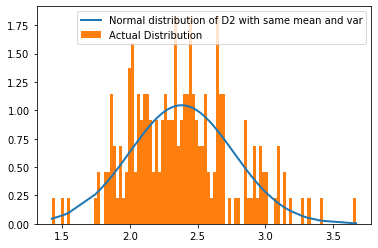

In [18]:
h = np.asarray(X_plot['D2'])
h = sorted(h)

fit = stats.norm.pdf(h,np.mean(h),np.std(h))

plt.plot(h,fit,linewidth =2,label="Normal distribution of D2 with same mean and var")
plt.hist(h,normed=True,bins=100,label="Actual Distribution")
plt.legend()
plt.show()

In [19]:
IQR_D2 = X_plot["D2"].quantile(0.75) - X_plot["D2"].quantile(0.25)

print('IQR_D2 -',IQR_D2)

high_Wiskers_outlier = X_plot["D2"].quantile(0.75) + 1.5*IQR_D2
print('Higher outliers for D2 >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["D2"].quantile(0.25)  - 1.5*IQR_D2
print('Lower outliers for D2 <',low_Wiskers_outlier)

IQR_D2 - 0.5373304999999999
Higher outliers for D2 > 3.44245175
Lower outliers for D2 < 1.29312975


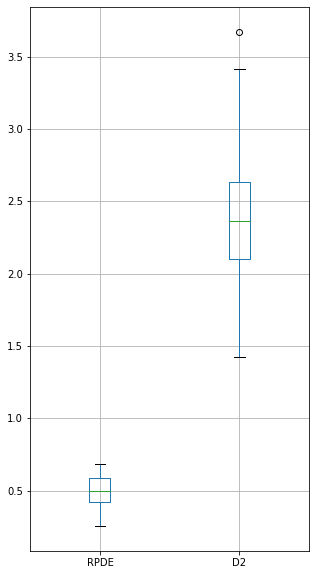

In [20]:
X_plot.boxplot(column=['RPDE', 'D2'],figsize = (5,10))

<font color=darkblue>

# Observations from the Univariate Analysis on RPDE,D2 - Two nonlinear dynamical complexity measures

   - Two nonlinear dynamical complexity measures are multi modal.
   - Two nonlinear dynamical complexity measures are positively Skewed
   - Seeing D2 nonlinear dynamical complexity measure has values above the upper wiskers limit.

# Checking Outliers  and Skewness on DFA - Signal fractal scaling exponent

In [22]:
DFA_mode = X_plot['DFA'].mode()
DFA_mean = X_plot['DFA'].mean()
DFA_median = X_plot['DFA'].median()

print('Mode:',DFA_mode)
print('Mean:',DFA_mean)
print('Median:',DFA_median)
print ('Skewness on DFA ',X_plot.skew()['DFA'])
if(DFA_mean > DFA_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode: 0      0.574282
1      0.582710
2      0.605417
3      0.623731
4      0.626710
         ...   
190    0.819521
191    0.821364
192    0.823484
193    0.825069
194    0.825288
Length: 195, dtype: float64
Mean: 0.7180990461538465
Median: 0.722254
Skewness on DFA  -0.03321366071385332
Then the distribution is negatively skewed.


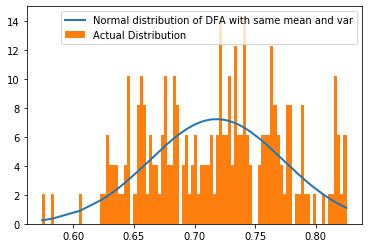

In [23]:
h = np.asarray(X_plot['DFA'])
h = sorted(h)

fit = stats.norm.pdf(h,np.mean(h),np.std(h))

plt.plot(h,fit,linewidth =2,label="Normal distribution of DFA with same mean and var")
plt.hist(h,normed=True,bins=100,label="Actual Distribution")
plt.legend()
plt.show()

In [24]:
IQR_DFA = X_plot["DFA"].quantile(0.75) - X_plot["DFA"].quantile(0.25)

print('IQR_DFA -',IQR_DFA)

high_Wiskers_outlier = X_plot["DFA"].quantile(0.75) + 1.5*IQR_DFA
print('Higher outliers for DFA >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["DFA"].quantile(0.25)  - 1.5*IQR_DFA
print('Lower outliers for DFA <',low_Wiskers_outlier)

IQR_DFA - 0.08712399999999998
Higher outliers for DFA > 0.8925675
Lower outliers for DFA < 0.5440715


Text(0.8, 0.544, 'Lower Outliers')

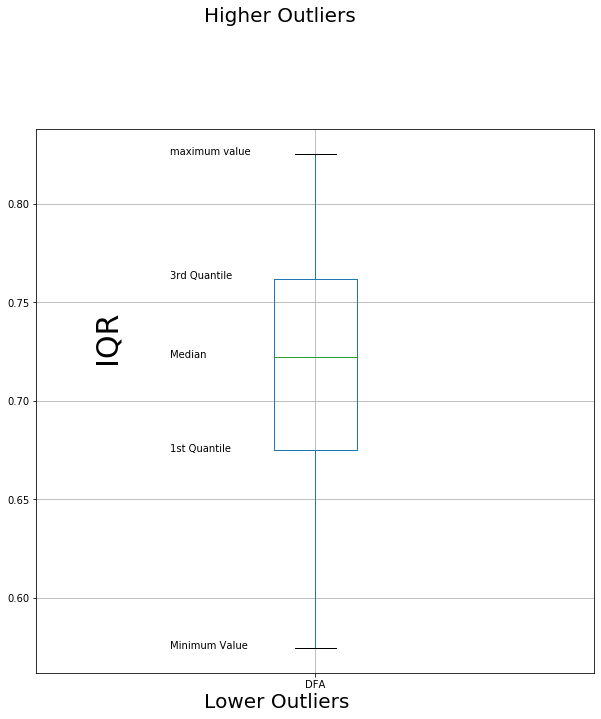

In [25]:
# Box Plot to show the outliers
X_plot.boxplot(column="DFA",return_type='axes',figsize=(10,10))
plt.text(x=0.74, y=0.762, s="3rd Quantile")
plt.text(x=0.74, y=0.722,  s="Median")
plt.text(x=0.74, y=0.674,  s="1st Quantile")
plt.text(x=0.74, y=0.574,  s="Minimum Value")
plt.text(x=0.74, y=0.825,  s="maximum value")
plt.text(x=0.80, y=0.8925, s="Higher Outliers",size=20)
plt.text(x=0.60, y= 0.722, s="IQR", rotation=90, size=30)
plt.text(x=0.80, y=0.544, s="Lower Outliers",size=20)

<font color=darkblue>

# Observations from the Univariate Analysis on DFA - Signal fractal scaling exponent

   - Signal fractal scaling exponent is multi modal.
   - Signal fractal scaling exponent is negatively Skewed
   - No Outliers

# Checking Outliers  and Skewness on spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

# Checking Outliers  and Skewness on spread1 - nonlinear measures of fundamental frequency variation 

In [28]:
spread1_mode = X_plot['spread1'].mode()
spread1_mean = X_plot['spread1'].mean()
spread1_median = X_plot['spread1'].median()

print('Mode:',spread1_mode)
print('Mean:',spread1_mean)
print('Median:',spread1_median)
print ('Skewness on spread1 ',X_plot.skew()['spread1'])
if(spread1_mean > spread1_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode: 0     -7.964984
1     -7.777685
2     -7.695734
3     -7.682587
4     -7.517934
         ...   
190   -3.269487
191   -2.931070
192   -2.929379
193   -2.839756
194   -2.434031
Length: 195, dtype: float64
Mean: -5.684396743589743
Median: -5.720868
Skewness on spread1  0.4321389320131748
Then the distribution is positively skewed.


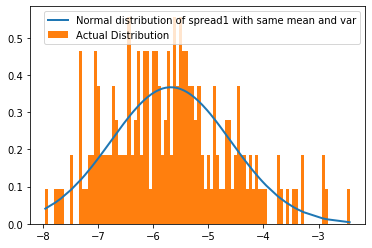

In [29]:
h = np.asarray(X_plot['spread1'])
h = sorted(h)

fit = stats.norm.pdf(h,np.mean(h),np.std(h))

plt.plot(h,fit,linewidth =2,label="Normal distribution of spread1 with same mean and var")
plt.hist(h,normed=True,bins=100,label="Actual Distribution")
plt.legend()
plt.show()

In [30]:
IQR_spread1 = X_plot["spread1"].quantile(0.75) - X_plot["spread1"].quantile(0.25)

print('IQR_spread1 -',IQR_spread1)

high_Wiskers_outlier = X_plot["spread1"].quantile(0.75) + 1.5*IQR_spread1
print('Higher outliers for spread1 >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["spread1"].quantile(0.25)  - 1.5*IQR_spread1
print('Lower outliers for spread1 <',low_Wiskers_outlier)

IQR_spread1 - 1.4039040000000007
Higher outliers for spread1 > -2.9403359999999985
Lower outliers for spread1 < -8.555952000000001


Text(0.8, -8.5559, 'Lower Outliers')

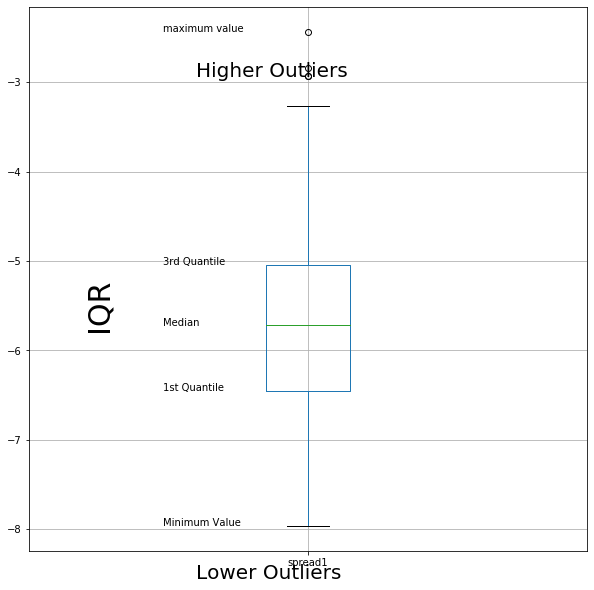

In [38]:
# Box Plot to show the outliers
X_plot.boxplot(column="spread1",return_type='axes',figsize=(10,10))
plt.text(x=0.74, y=-5.046192, s="3rd Quantile")
plt.text(x=0.74, y=-5.720868,  s="Median")
plt.text(x=0.74, y=-6.450096,  s="1st Quantile")
plt.text(x=0.74, y=-7.964984,  s="Minimum Value")
plt.text(x=0.74, y=-2.434031,  s="maximum value")
plt.text(x=0.80, y=-2.940335, s="Higher Outliers",size=20)
plt.text(x=0.60, y=-5.720868, s="IQR", rotation=90, size=30)
plt.text(x=0.80, y=-8.5559, s="Lower Outliers",size=20)

# Checking Outliers  and Skewness on spread2 - nonlinear measures of fundamental frequency variation 

In [31]:
spread2_mode = X_plot['spread2'].mode()
spread2_mean = X_plot['spread2'].mean()
spread2_median = X_plot['spread2'].median()

print('Mode:',spread2_mode)
print('Mean:',spread2_mean)
print('Median:',spread2_median)
print ('Skewness on spread2 ',X_plot.skew()['spread2'])
if(spread2_mean > spread2_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode: 0    0.210279
dtype: float64
Mean: 0.2265103487179486
Median: 0.218885
Skewness on spread2  0.14443048549278925
Then the distribution is positively skewed.


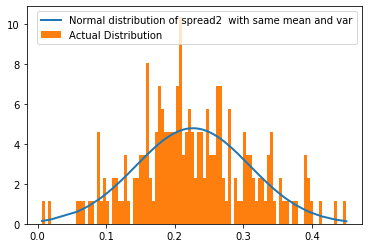

In [32]:
 h = np.asarray(X_plot['spread2'])
h = sorted(h)

fit = stats.norm.pdf(h,np.mean(h),np.std(h))

plt.plot(h,fit,linewidth =2,label="Normal distribution of spread2  with same mean and var")
plt.hist(h,normed=True,bins=100,label="Actual Distribution")
plt.legend()
plt.show()

In [33]:
IQR_spread2 = X_plot["spread2"].quantile(0.75) - X_plot["spread2"].quantile(0.25)

print('IQR_spread2 -',IQR_spread2)

high_Wiskers_outlier = X_plot["spread2"].quantile(0.75) + 1.5*IQR_spread2
print('Higher outliers for spread2 >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["spread2"].quantile(0.25)  - 1.5*IQR_spread2
print('Lower outliers for spread2 <',low_Wiskers_outlier)

IQR_spread2 - 0.10488349999999996
Higher outliers for spread2 > 0.43655924999999995
Lower outliers for spread2 < 0.017025250000000075


Text(0.8, 0.017025, 'Lower Outliers')

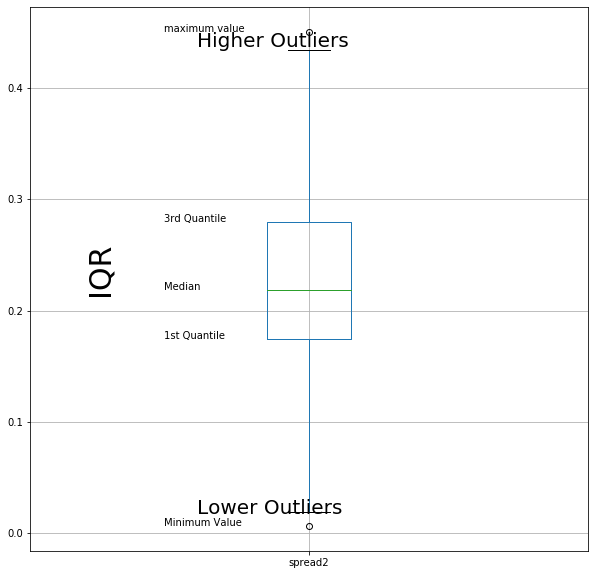

In [39]:
# Box Plot to show the outliers
X_plot.boxplot(column="spread2",return_type='axes',figsize=(10,10))
plt.text(x=0.74, y=0.279234, s="3rd Quantile")
plt.text(x=0.74, y=0.218885,  s="Median")
plt.text(x=0.74, y=0.174351,  s="1st Quantile")
plt.text(x=0.74, y=0.006274,  s="Minimum Value")
plt.text(x=0.74, y=0.450493,  s="maximum value")
plt.text(x=0.80, y=0.436559, s="Higher Outliers",size9=20)
plt.text(x=0.60, y=0.218885, s="IQR", rotation=90, size=30)
plt.text(x=0.80, y=0.017025, s="Lower Outliers",size=20)

# Checking Outliers  and Skewness on PPE - nonlinear measures of fundamental frequency variation 

In [40]:
ppe_mode = X_plot['PPE'].mode()
ppe_mean = X_plot['PPE'].mean()
ppe_median = X_plot['PPE'].median()

print('Mode:',ppe_mode)
print('Mean:',ppe_mean)
print('Median:',ppe_median)
print ('Skewness on PPE ',X_plot.skew()['PPE'])
if(ppe_mean > ppe_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode: 0      0.044539
1      0.056141
2      0.057610
3      0.068501
4      0.073581
         ...   
190    0.430788
191    0.444774
192    0.454721
193    0.457533
194    0.527367
Length: 195, dtype: float64
Mean: 0.20655164102564108
Median: 0.194052
Skewness on PPE  0.797491071646355
Then the distribution is positively skewed.


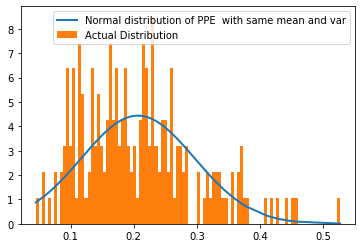

In [41]:
 h = np.asarray(X_plot['PPE'])
h = sorted(h)

fit = stats.norm.pdf(h,np.mean(h),np.std(h))

plt.plot(h,fit,linewidth =2,label="Normal distribution of PPE  with same mean and var")
plt.hist(h,normed=True,bins=100,label="Actual Distribution")
plt.legend()
plt.show()

In [42]:
IQR_ppe = X_plot["PPE"].quantile(0.75) - X_plot["PPE"].quantile(0.25)

print('IQR_ppe -',IQR_ppe)

high_Wiskers_outlier = X_plot["PPE"].quantile(0.75) + 1.5*IQR_ppe
print('Higher outliers for spread2 >',high_Wiskers_outlier)

low_Wiskers_outlier = X_plot["PPE"].quantile(0.25)  - 1.5*IQR_ppe
print('Lower outliers for spread2 <',low_Wiskers_outlier)

IQR_ppe - 0.11552899999999999
Higher outliers for spread2 > 0.42627349999999997
Lower outliers for spread2 < -0.0358425


Text(0.8, -0.0358425, 'Lower Outliers')

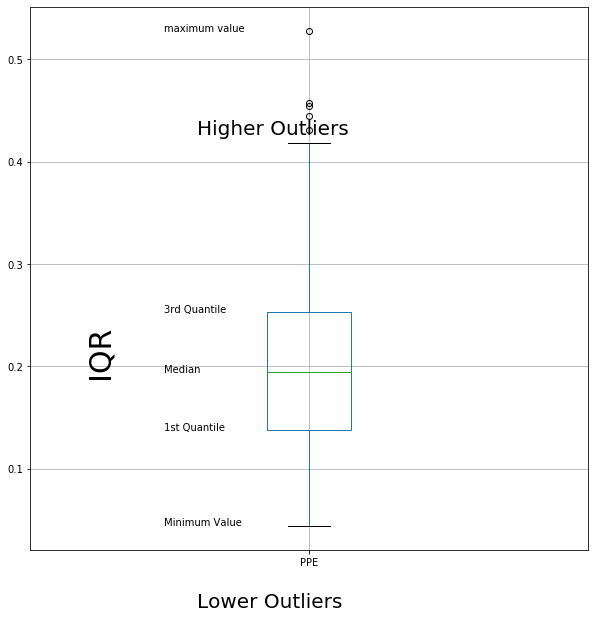

In [43]:
# Box Plot to show the outliers
X_plot.boxplot(column="PPE",return_type='axes',figsize=(10,10))
plt.text(x=0.74, y=0.25298, s="3rd Quantile")
plt.text(x=0.74, y=0.194052,  s="Median")
plt.text(x=0.74, y=0.137451,  s="1st Quantile")
plt.text(x=0.74, y=0.044539,  s="Minimum Value")
plt.text(x=0.74, y=0.527367,  s="maximum value")
plt.text(x=0.80, y=0.42627, s="Higher Outliers",size=20)
plt.text(x=0.60, y=0.194052, s="IQR", rotation=90, size=30)
plt.text(x=0.80, y=-0.0358425, s="Lower Outliers",size=20)  

<font color=darkblue>

# Observations from the Univariate Analysis on spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

   - Spread1 and PPE are multi modal distribution where the spread2 is the unimodal distribution
   - Non Linear Mesaures of fundamental frequency are positively skewed
   - Seeing outliers above the upper wiskers limit.

In [44]:
Data = parkinson_df.drop(['Serial_No','name'],axis=1)  

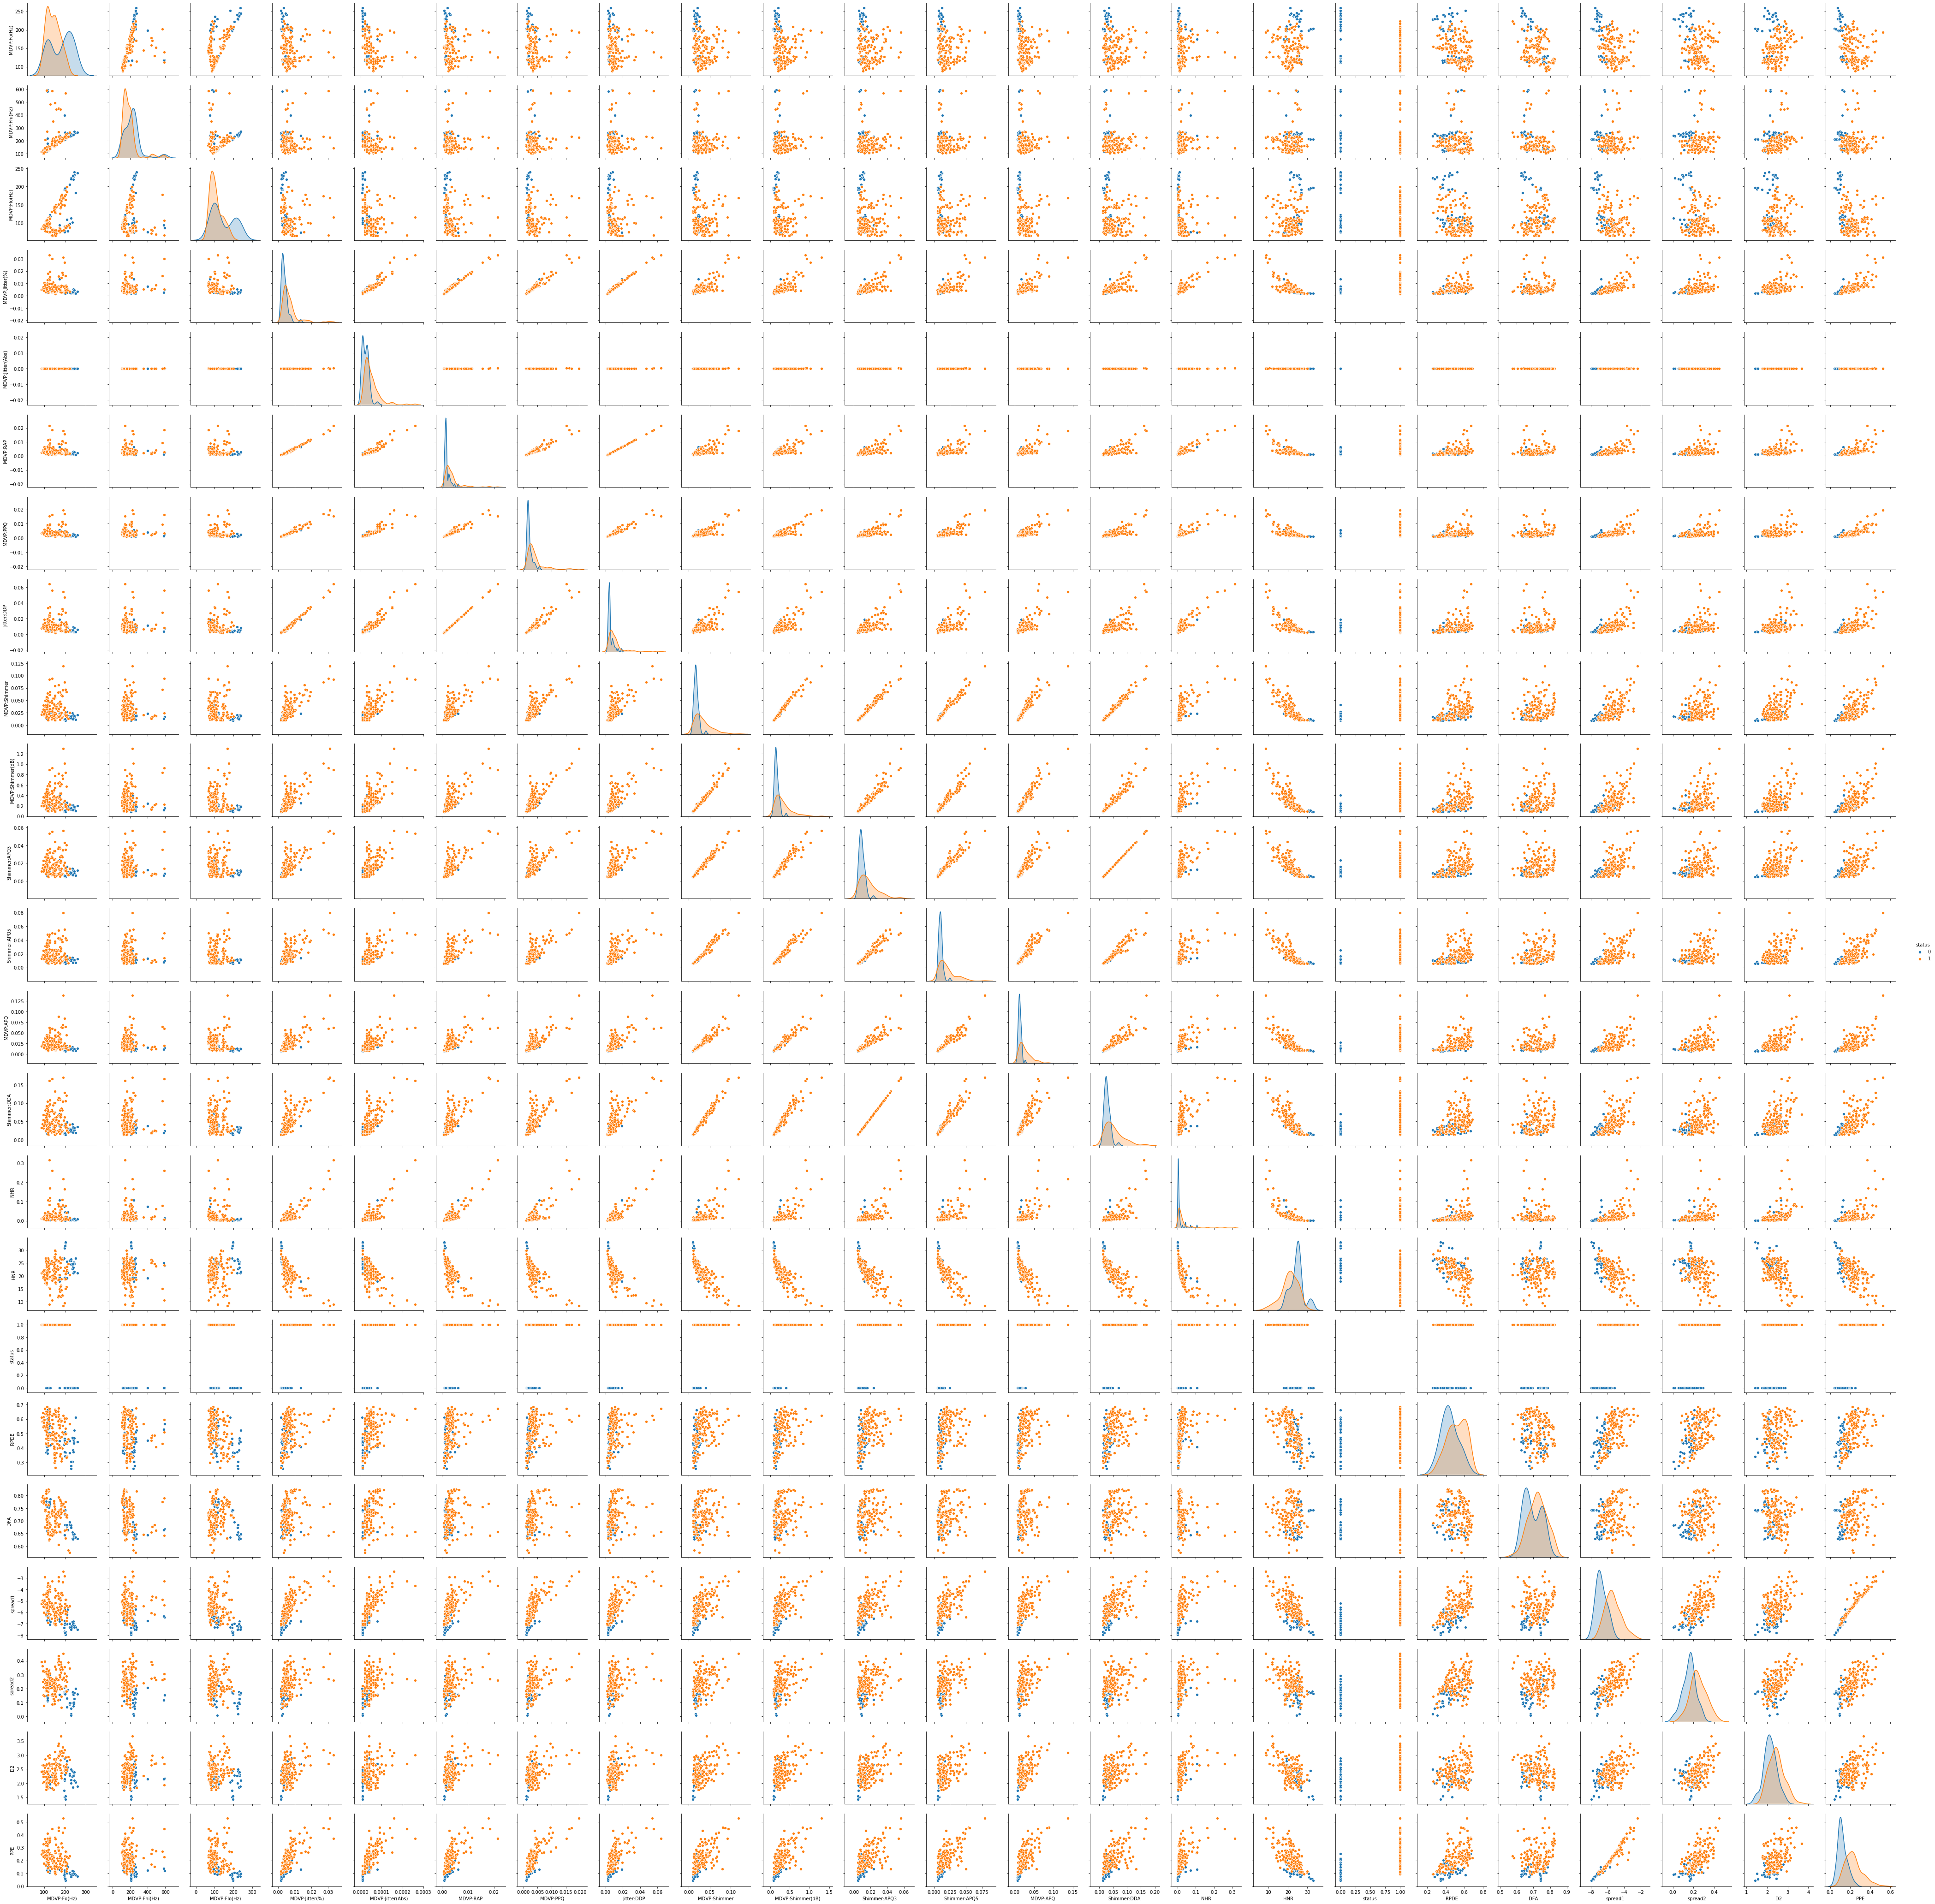

In [56]:
sns.pairplot(Data,diag_kind='kde',hue='status')

<font color=darkblue>

# Observations from Pairplot.

   - spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation showing the variations in distribution among the healthy and PD affected Patients. These features will be helpful in predicting the PD affected patients.
   - RPDE,D2 - Two nonlinear dynamical complexity measures showing the variations in distribution among the healthy and PD affected Patients.
   - Vocal fundamental frequency showing variations in distribution among the healthy and PD affected Patients.
   - From the above Pair plot Many attributes have a strong linear relationship, each of them are studied individual on the below Bivariate analysis.


<font color=darkblue>

# Bivariate Analysis on Status vs MDVP:Fo(Hz) - Average vocal fundamental frequency ,MDVP:Fhi(Hz) - Maximum vocal fundamental frequency,MDVP:Flo(Hz) - Minimum vocal fundamental frequency

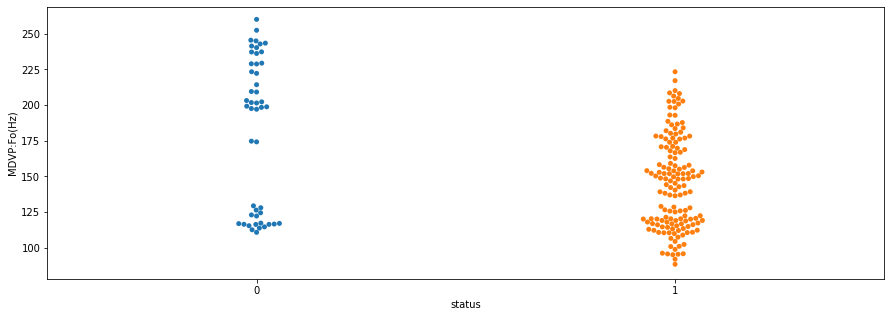

In [55]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='MDVP:Fo(Hz)',data = Data)
plt.show()

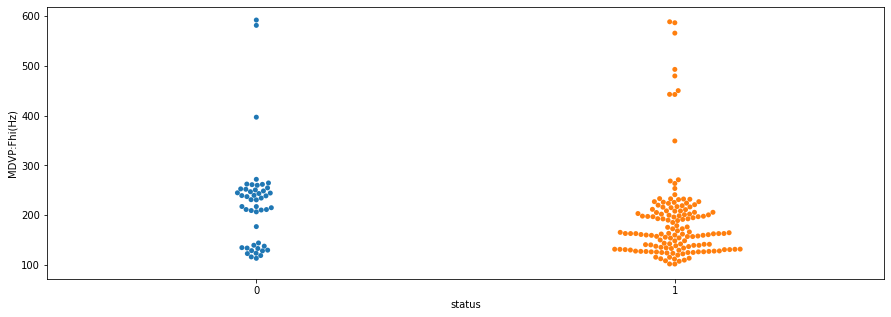

In [57]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='MDVP:Fhi(Hz)',data = Data)
plt.show()

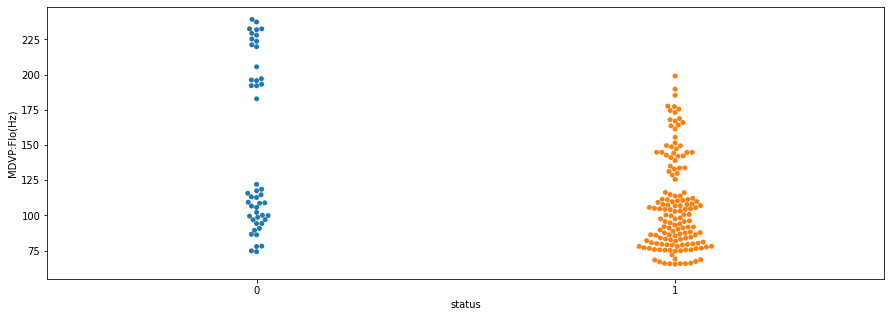

In [59]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='MDVP:Flo(Hz)',data = Data)
plt.show()

<font color=darkblue>

# Observations from the Bivariate Analysis on status vs MDVP:Fo(Hz) - Average vocal fundamental frequency,MDVP:Fhi(Hz) - Maximum vocal fundamental frequency,MDVP:Flo(Hz) - Minimum vocal fundamental frequency 

   - Pateints having MDVP:Fo(Hz) - (Average vocal fundamental frequency) between 130 Hz to 190 Hz are having the parkinson disorder.
   - Patients having MDVP:Fhi(Hz) - Maximum vocal fundamental frequency between 150 Hz to 200 Hz are having the parkinson disorder.
   - Patients having MDVP:Flo(Hz) - Minimum vocal fundamental frequency between 125 Hz to 175 Hz are having the parkinson disorder.
   - Densely populated area of Parkinson patients are from 75 Hz to 125 HZ with Minimum vocal fundamental frequency (MDVP:Flo(Hz)),but at the same time there are healthy peoples have the frequency from 75 to 125.

<font color=darkblue>

# Bivariate Analysis on Status vs MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

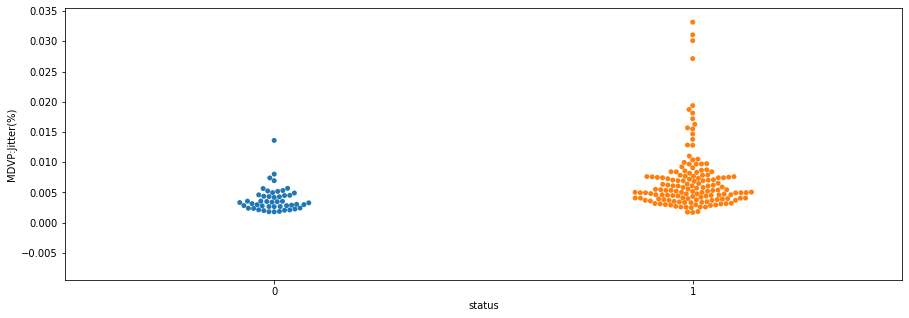

In [65]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='MDVP:Jitter(%)',data = Data)
plt.show()

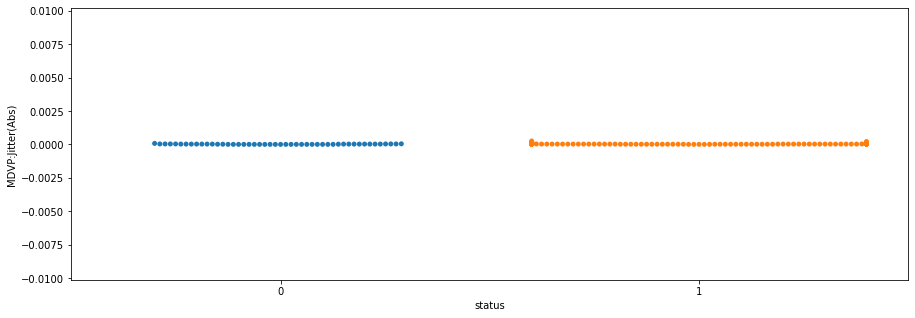

In [61]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='MDVP:Jitter(Abs)',data = Data)
plt.show()

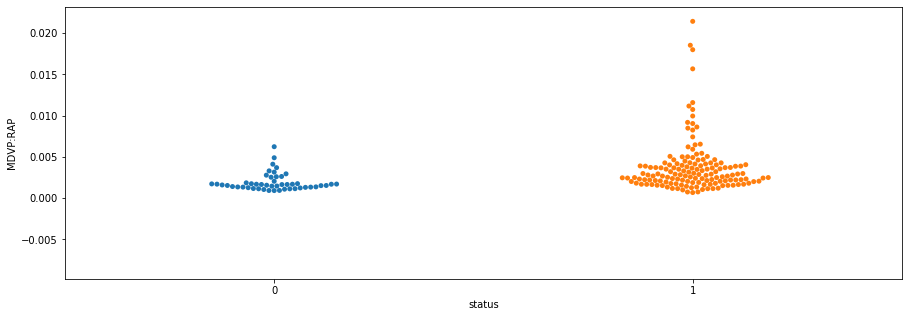

In [62]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='MDVP:RAP',data = Data)
plt.show()

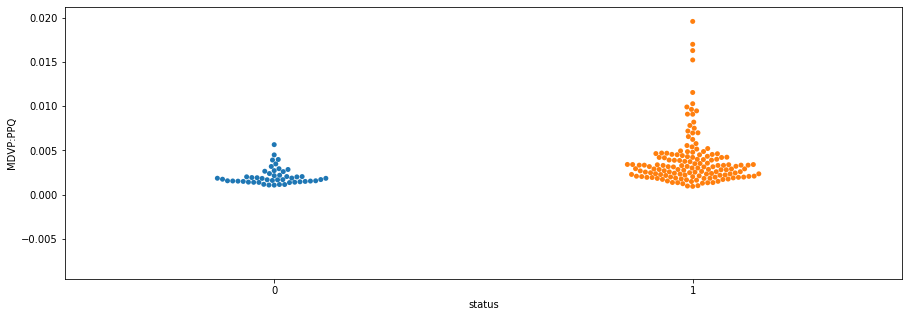

In [63]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='MDVP:PPQ',data = Data)
plt.show()

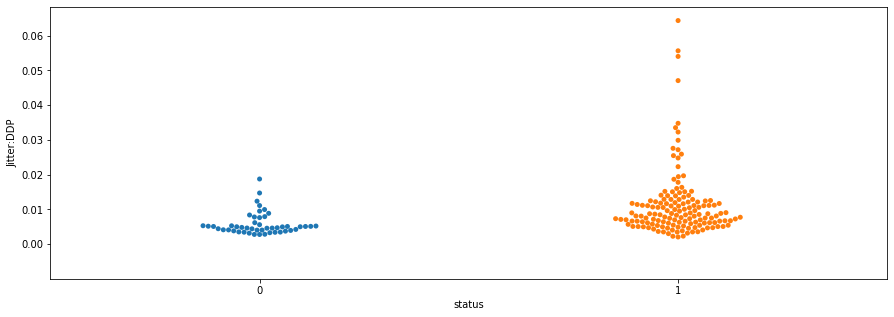

In [64]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='Jitter:DDP',data = Data)
plt.show()

<font color=darkblue>

# Observations from the Bivariate Analysis on status vs MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency 

   - If the MDVP:Jitter(%) above 0.01% are bound to have PD disorder, but the densely populated PD patients are from 0.00 % to 0.01%, Healthy peoples also populated between 0.00 to 0.01
   - If the MDVP:RAP is above 0.005, the patients are having PD disorder.
   - If the MDVP:PPQ is above 0.003, the patients are having PD disorder.
   - If the Jitter:DDP is above 0.01, the patients are having PD disorder.

# Bivariate Analysis on status vs MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3, Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

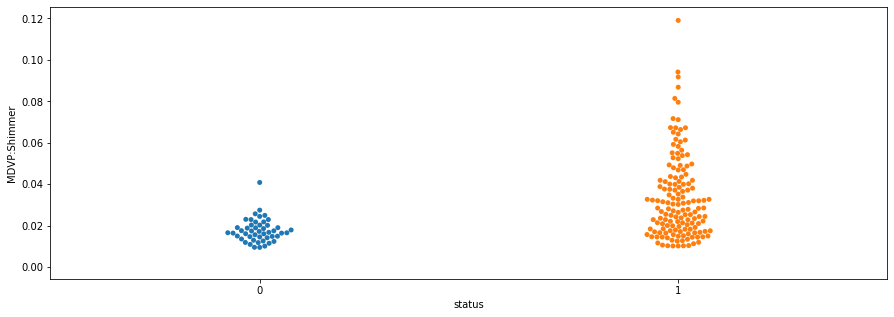

In [66]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='MDVP:Shimmer',data = Data)
plt.show()

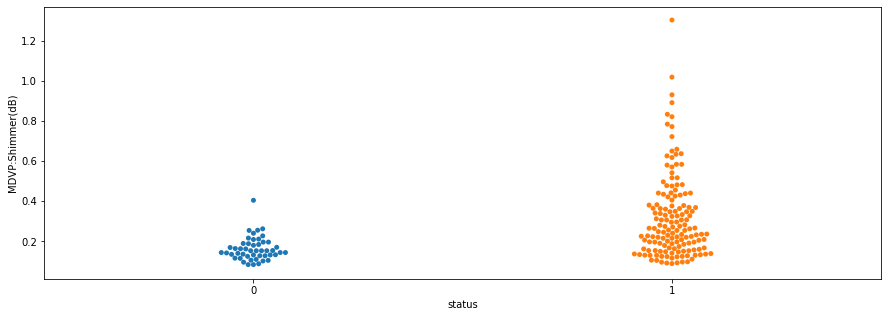

In [67]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='MDVP:Shimmer(dB)',data = Data)
plt.show()

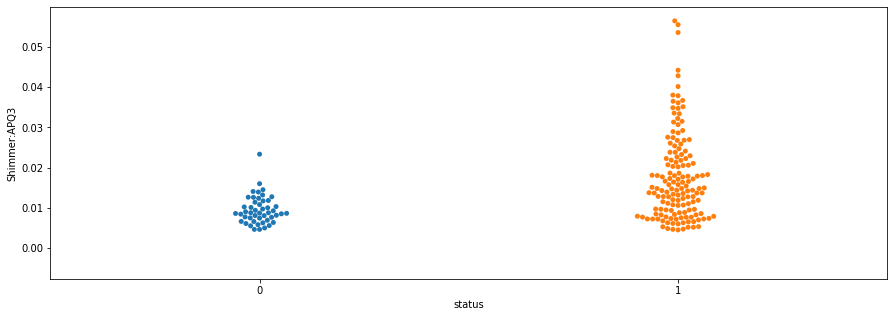

In [69]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='Shimmer:APQ3',data = Data)
plt.show()

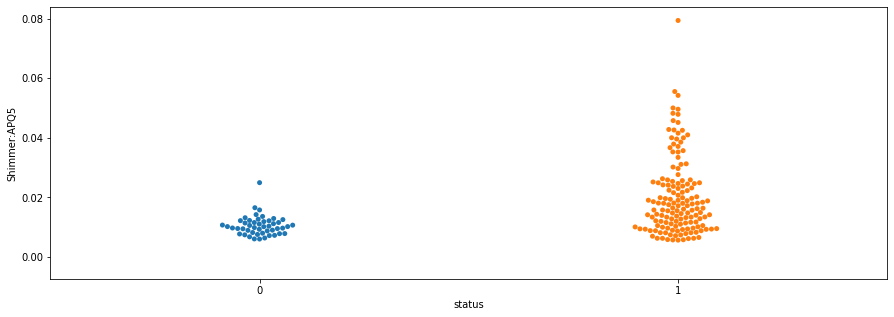

In [70]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='Shimmer:APQ5',data = Data)
plt.show()

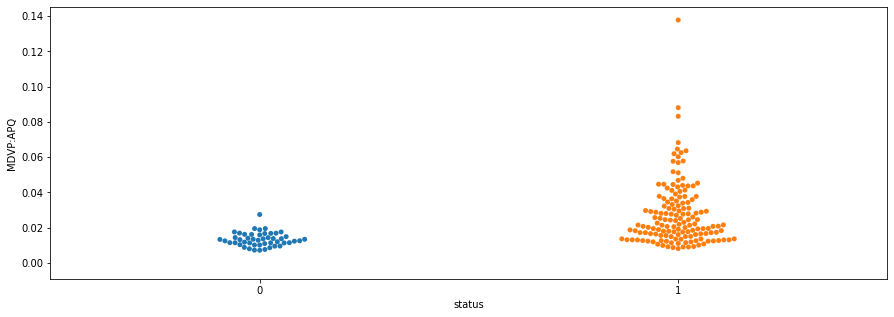

In [71]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='MDVP:APQ',data = Data)
plt.show()

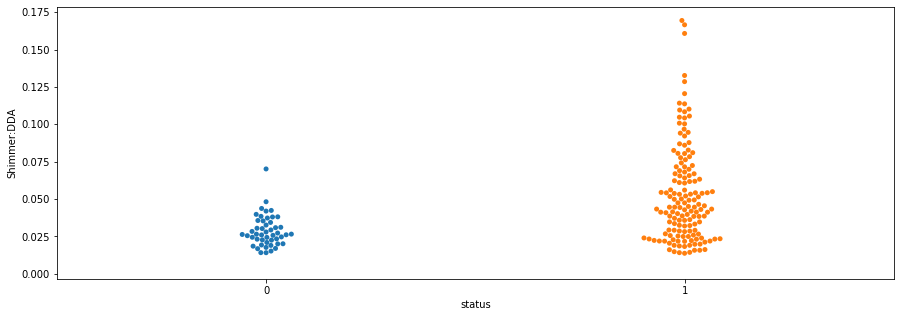

In [72]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='Shimmer:DDA',data = Data)
plt.show()

<font color=darkblue>

# Bivariate Analysis on status vs MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3, Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

- If the MDVP:Shimmer value is above 0.03 the pateints are suffering from PD disorder.
- If the MDVP:Shimmer(dB) value is above 0.2 Decibal, the patients having PD disorder.
- If the Shimmer:APQ3 value is above 0.01, the patients having PD disorder.
- If the Shimmer:APQ5 value is above 0.02, the patients having PD disorder.
- If the MDVP:APQ value is above 0.02, the patients having PD disorder.
- If the Shimmer:DDA is above 0.05, the patients having PD disorder.

# Bivariate Analysis on status vs NHR,HNR - Two measures of ratio of noise to tonal components in the voice

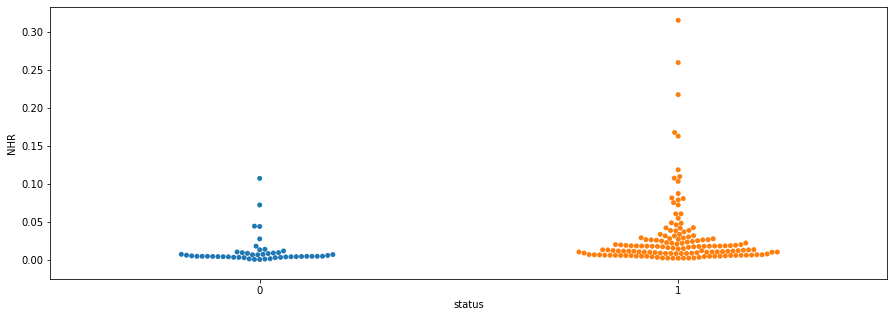

In [73]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='NHR',data = Data)
plt.show()

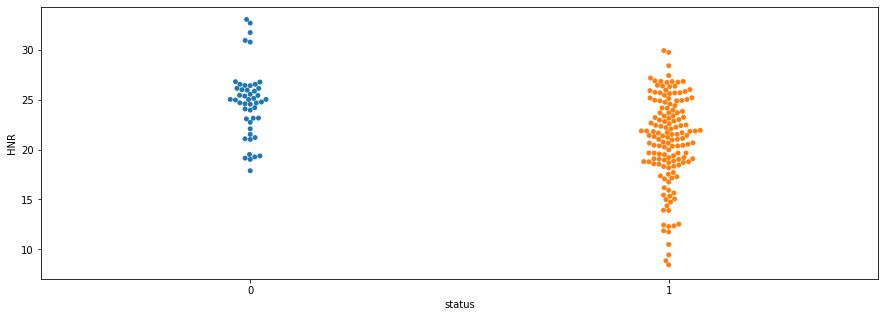

In [74]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='HNR',data = Data)
plt.show()

<font color=darkblue>

# Observations from Bivariate Analysis on status vs NHR,HNR - Two measures of ratio of noise to tonal components in the voice

- If the NHR value is above 0.02,most of the patients are detected with PD disorder.
- If the HNR value is below 16, the pateints are having PD disorder.

# Bivariate Analysis on status vs RPDE,D2 - Two nonlinear dynamical complexity measures

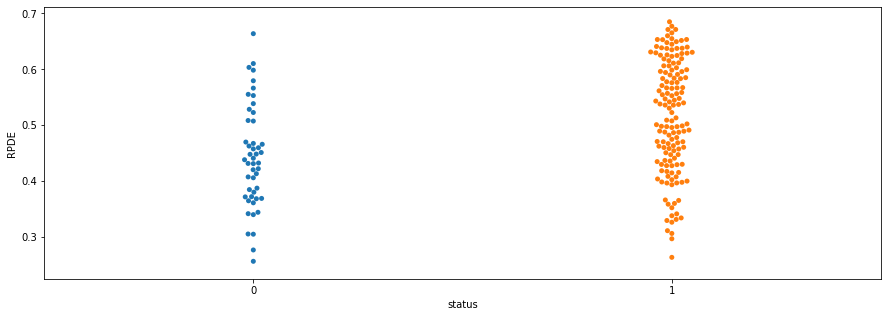

In [75]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='RPDE',data = Data)
plt.show()

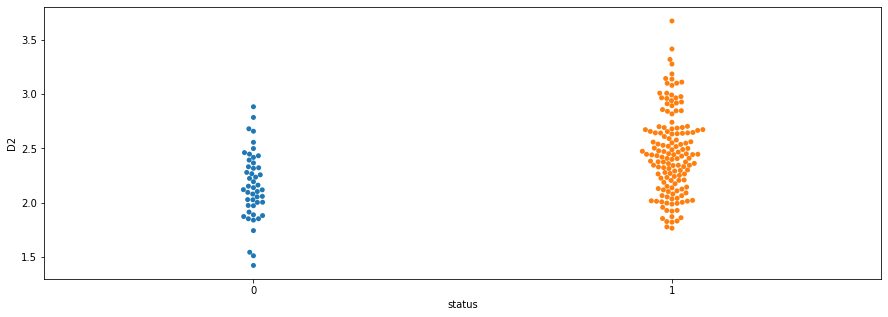

In [76]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='D2',data = Data)
plt.show()

<font color=darkblue>

# Observations from Bivariate Analysis on status vs RPDE,D2 - Two nonlinear dynamical complexity measures

- If the RPDE value is above 0.6,most of the patients are detected with PD disorder.
- If the D2 value is above 2.8, the pateints are having PD disorder.

# Bivariate Analysis on status vs DFA - Signal fractal scaling exponent

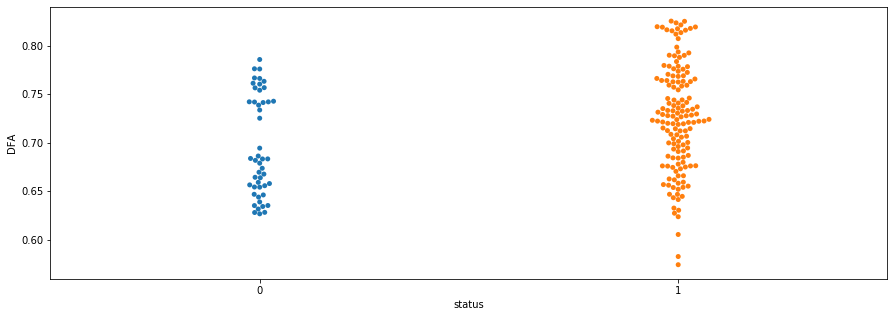

In [78]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='DFA',data = Data)
plt.show()

<font color=darkblue>

# Observations from Bivariate Analysis on status vs DFA - Signal fractal scaling exponent

- If the DFA value is between 0.68 and 0.72, and the value above 0.78 are bound to have PD disorder

# Bivariate Analysis on status vs spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

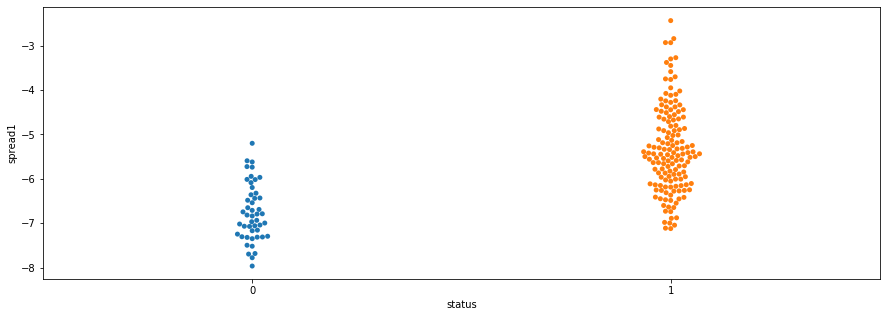

In [79]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='spread1',data = Data)
plt.show()

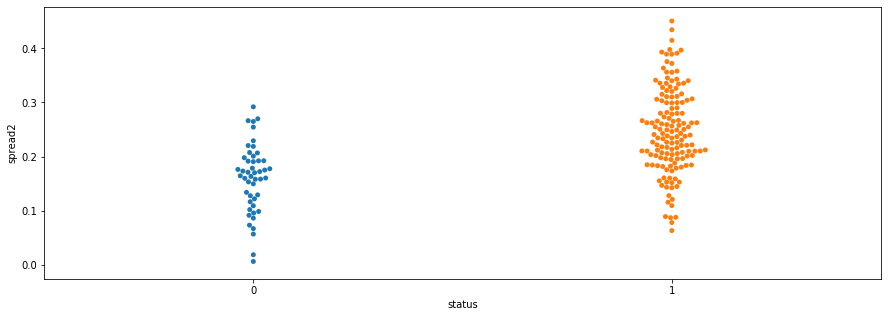

In [80]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='spread2',data = Data)
plt.show()

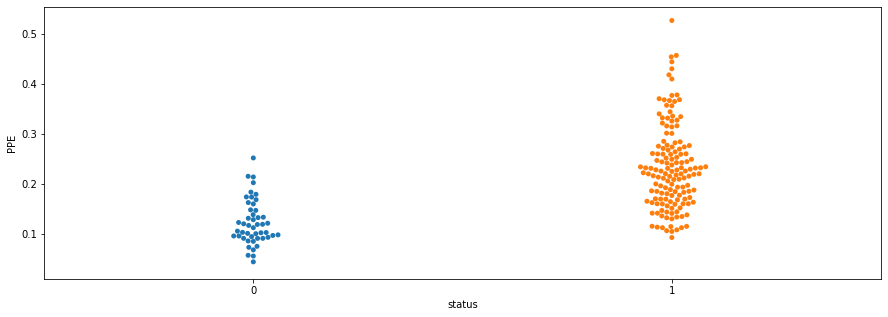

In [81]:
figure = plt.figure(figsize=(15,5))
sns.swarmplot(x='status',y='PPE',data = Data)
plt.show()

<font color=darkblue>

# Observations from Bivariate Analysis on status vs spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

- If the spread1 value is above -5, the patients are having PD disorder.
- If the spread2 value is above 0.3, the patients are having PD disorder.
- If the PPE value is above 0.27, the patients are having PD disorder.

# 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [45]:
# Split the Independent Variables
X = Data.drop(columns='status',axis=1)

#Split the target Variable
y = Data['status']

# Shuffle and split the dataset into the number of training and testing points above
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [46]:
# Show the results of the split

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 136 samples.
Testing set has 59 samples.


In [47]:
# As the dataset is biased towards the PD disorder Patients, I would like to do Upsampling to balance my data set.
# As Downsampling always increase the recall and the gap between recall and precision varies more, 
# So its ideal to do Upsampling where the gap between recall and precision will vary less and ideal for unbalanced
# Data set.

# Separate PD and Healthy patients
parkinson_majority = Data[Data.status==1]
parkinson_minority = Data[Data.status==0]

print('parkinson_majority :',parkinson_majority.shape)

print('parkinson_minority :',parkinson_minority.shape)
 
# Upsample minority class
parkinson_minority_upsampled = resample(parkinson_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=147,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
parkinson_upsampled = pd.concat([parkinson_majority, parkinson_minority_upsampled])

# Display new class counts
parkinson_upsampled.status.value_counts()
print('parkinson_upsampled:',parkinson_upsampled.shape)

parkinson_majority : (147, 23)
parkinson_minority : (48, 23)
parkinson_upsampled: (294, 23)


In [48]:
#Splitting the upsampled Dataset

# Split the Independent Variables
X_upsample = parkinson_upsampled.drop(columns='status',axis=1)

#Split the target Variable
y_upsample = parkinson_upsampled['status']

# Shuffle and split the dataset into the number of training and testing points above
X_train_upsample,X_test_upsample,y_train_upsample,y_test_upsample = train_test_split(X_upsample,y_upsample,
                                                                                   test_size=0.3,random_state=1)

# Show the results of the split

print("Upsampled Training set has {} samples.".format(X_train_upsample.shape[0]))
print("Upsampled Testing set has {} samples.".format(X_test_upsample.shape[0]))

Upsampled Training set has 205 samples.
Upsampled Testing set has 89 samples.


# 5.Create the model using “entropy” method of reducing the entropy and fit it to training data.

In [49]:
# Decision Tree without upsampling.

model_Dt = DecisionTreeClassifier(criterion='entropy')
model_Dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
#Decision Tree with Upsampling

model_Dt_upsampled = DecisionTreeClassifier(criterion='entropy')
model_Dt_upsampled.fit(X_train_upsample, y_train_upsample)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab.

In [126]:
# Accuracy without Upsampling
DT_Train=model_Dt.score(X_train, y_train)
DT_Test=model_Dt.score(X_test, y_test)

# Output
print("Train Accuracy:",DT_Train)
print("Test Accuracy:",DT_Test,"\n")

DT_Predict = model_Dt.predict(X_test)

print('Predicted Values for Test Set:',DT_Predict,"\n")

print('----Confusion Matrix  for Test Set without Upsampling----',"\n")

print(confusion_matrix(y_test,DT_Predict))


print('----Confusion Matrix  for Training Set without Upsampling----',"\n")

print(confusion_matrix(y_train,model_Dt.predict(X_train)))



print('-----Classification_report for Test Set without Upsampling ----',"\n")
print(classification_report(y_test,DT_Predict))
print("\n")

Train Accuracy: 1.0
Test Accuracy: 0.847457627118644 

Predicted Values for Test Set: [1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1] 

----Confusion Matrix  for Test Set without Upsampling---- 

[[11  8]
 [ 1 39]]
----Confusion Matrix  for Training Set without Upsampling---- 

[[ 29   0]
 [  0 107]]
-----Classification_report for Test Set without Upsampling ---- 

              precision    recall  f1-score   support

           0       0.92      0.58      0.71        19
           1       0.83      0.97      0.90        40

    accuracy                           0.85        59
   macro avg       0.87      0.78      0.80        59
weighted avg       0.86      0.85      0.84        59





In [128]:
# Accuracy with Upsampling

DT_Train_upsampled=model_Dt_upsampled.score(X_train_upsample, y_train_upsample)
DT_Test_upsampled=model_Dt_upsampled.score(X_test_upsample, y_test_upsample)

# Output
print("Train Accuracy:",DT_Train_upsampled)
print("Test Accuracy:",DT_Test_upsampled,"\n")

DT_Upsampling_Predict = model_Dt_upsampled.predict(X_test_upsample)

print('Predicted Values:',DT_Upsampling_Predict,"\n")

print('----Confusion Matrix for Test Set with Upsampling----',"\n")

print(confusion_matrix(y_test_upsample,DT_Upsampling_Predict))


print('-----Classification_report for Test Set----',"\n")
print(classification_report(y_test_upsample,DT_Upsampling_Predict))
print("\n")



print('----Confusion Matrix  for Training Set with Upsampling----',"\n")

print(confusion_matrix(y_train_upsample,model_Dt_upsampled.predict(X_train_upsample)))

Train Accuracy: 1.0
Test Accuracy: 0.9550561797752809 

Predicted Values: [0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0
 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1] 

----Confusion Matrix for Test Set with Upsampling---- 

[[48  0]
 [ 4 37]]
-----Classification_report for Test Set---- 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        48
           1       1.00      0.90      0.95        41

    accuracy                           0.96        89
   macro avg       0.96      0.95      0.95        89
weighted avg       0.96      0.96      0.95        89



----Confusion Matrix  for Training Set with Upsampling---- 

[[ 99   0]
 [  0 106]]


<font color=darkblue>

# Cross Tab for Decision Tree Model: 

   - <b> Confusion Matrix  for Test Set without Upsampling </b>

| Total=59 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 11 | 8 | 19 |
| Actual 1   | 1 | 39| 40 |
| Col Total | 12 | 47 | 59|

   - Of the 40 Actual patients  with Parkinson Disorder, the model correctly classified 39 patients with Parkinson Disorder.
   - Of the 19 Healthy patients, the model correctly classified 11 patients as Healthy Patients.
   - 8 Patients who are healthy are predicted with PD disorder, which are Type- 1 error.
   - 1 patient who actually suffering from PD disorder but identified as healthy patient which is a dangerous Type-2 error.
   -  % Correctly predicted as patients with PD Disorder is 0.83.
   -  % Correctly predicted as Healthy Patients is 0.92.
   -  % Correctly Detected as patients with PD Disorder is 0.97.
   -  % Correctly Detected as patients as Healthy is 0.58.

- <b> Confusion Matrix for the Training Data Set without Upsampling</b>

| Total=136 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 29 | 0 | 29 |
| Actual 1   | 0 | 107| 107 |
| Col Total | 29 | 107 | 136|

   - Of the 107 Actual PD disorder Patients, the model correctly classified 107 canditates as PD disorder Patients.
   - Of the 29 Healthy Patients, the model correctly classified 29 as Healthy patients.
   - There is no Type-1 and Type-2 error which means the model is <b> Overfit</b> for train Data set.
   
- <b> Confusion Matrix for the Test Data Set with Upsampling</b>
   
| Total=89 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 48 | 0 | 48 |
| Actual 1   | 4 | 37| 41 |
| Col Total | 52 | 37 | 89|

   - Of the 41 Actual patients  with Parkinson Disorder, the model correctly classified 37 patients with Parkinson Disorder.
   - Of the 48 Healthy patients, the model correctly classified 48 patients as Healthy Patients.
   - There is no Type- 1 error.
   - 4 patient who actually suffering from PD disorder but identified as healthy patient which is a dangerous Type-2 error.
   
- <b> Confusion Matrix for the Train Data Set with Upsampling</b>
   
| Total=205 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 99 | 0 | 99 |
| Actual 1   | 0 | 106| 106 |
| Col Total | 99 | 106 | 205|

   - Of the 106 Actual patients detected with Parkinson Disorder, the model correctly classified 106 patients with Parkinson Disorder.
   - Of the 99 Healthy patients, the model correctly classified 99 patients as Healthy Patients.
   - There is no Type- 1 error and Type-2 error which means the model is <b> Overfit</b> for train Dataset.

# 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)

In [156]:
# Decision Tree without upsampling.

model_Dt_reg = DecisionTreeClassifier(criterion='entropy',splitter='best',
                                max_depth=5,
                                min_samples_split=2,
                                min_samples_leaf=2,
                                min_weight_fraction_leaf=0.2,
                                max_features='auto',
                                random_state=5,
                                max_leaf_nodes=2)
model_Dt_reg.fit(X_train, y_train)

# Accuracy without Upsampling
DT_Train_reg = model_Dt_reg.score(X_train, y_train)
DT_Test_reg = model_Dt_reg.score(X_test, y_test)

# Output
print("Train Accuracy:",DT_Train_reg)
print("Test Accuracy:",DT_Test_reg,"\n") 


print('----Confusion Matrix  for regularized Models Test Set without Upsampling----',"\n")

print(confusion_matrix(y_test,model_Dt_reg.predict(X_test)))


print('----Confusion Matrix  for regularized Models Training Set without Upsampling----',"\n")
  
print(confusion_matrix(y_train,model_Dt_reg.predict(X_train)))


print('-----Classification_report for Regularized Test Set without Upsampling ----',"\n")
print(classification_report(y_test,model_Dt_reg.predict(X_test)))
print("\n")

Train Accuracy: 0.8602941176470589
Test Accuracy: 0.8135593220338984 

----Confusion Matrix  for regularized Models Test Set without Upsampling---- 

[[13  6]
 [ 5 35]]
----Confusion Matrix  for regularized Models Training Set without Upsampling---- 

[[22  7]
 [12 95]]
-----Classification_report for Regularized Test Set without Upsampling ---- 

              precision    recall  f1-score   support

           0       0.72      0.68      0.70        19
           1       0.85      0.88      0.86        40

    accuracy                           0.81        59
   macro avg       0.79      0.78      0.78        59
weighted avg       0.81      0.81      0.81        59





<font color=darkblue>

# Cross Tab for Decision Tree Model: 

   - <b> Confusion Matrix  for Test Set without Upsampling </b>

| Total=59 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 13 | 6 | 19 |
| Actual 1   | 5 | 35| 40 |
| Col Total | 18 | 41 | 59|

   - Of the 40 Actual patients with Parkinson Disorder, the model correctly classified 35 patients with Parkinson Disorder.
   - Of the 19 Healthy patients, the model correctly classified 13 patients as Healthy Patients.
   - 6 Patients who are healthy are predicted with PD disorder, which are Type- 1 error.
   - 5 patient who actually suffering from PD disorder but identified as healthy patient which is a dangerous Type-2 error.
   -  % Correctly predicted as patients with PD Disorder is 0.85.
   -  % Correctly predicted as Healthy Patients is 0.72.
   -  % Correctly Detected as patients with PD Disorder is 0.88.
   -  % Correctly Detected as patients as Healthy is 0.68.

  -<b> Impact in model accuracy for the Test Set without upsampling</b>
    - Model has been improved from overfit model to normal/good model.
     - Train Accuracy after regularization is 0.8602941176470589
     - Test Accuracy after regularization is 0.8135593220338984
     - Precision is increased for predicting the patients with PD disorder.
     - Recall is increased for detecting the patients as Healthy.
     
  -<b> How does regularization helps?</b>
        - I have tune with max_depth of the node =5,min_samples_split=2,min_samples_leaf=2,
          min_weight_fraction_leaf=0.2,max_features='auto',random_state=5,max_leaf_nodes=2 
          Which make my model from overfit to Good accuracy, the model has increased the predicting capability
          of PD disorder patients and increased in detecting healthy patients wisely

In [157]:
# Decision Tree with upsampling.

model_Dt_upsample_reg = DecisionTreeClassifier(criterion='entropy',splitter='best',
                                max_depth=5,
                                min_samples_split=2,
                                min_samples_leaf=2,
                                min_weight_fraction_leaf=0.1,
                                max_features='auto',
                                random_state=5,
                                max_leaf_nodes=2)
model_Dt_upsample_reg.fit(X_train_upsample, y_train_upsample)

# Accuracy with Upsampling
DT_Train_reg_upsample=model_Dt_upsample_reg.score(X_train_upsample, y_train_upsample)
DT_Test_reg_upsample=model_Dt_upsample_reg.score(X_test_upsample, y_test_upsample)

# Output
print("Train Accuracy:",DT_Train_reg_upsample)
print("Test Accuracy:",DT_Test_reg_upsample,"\n")

print('----Confusion Matrix  for regularized Models Test Set with Upsampling----',"\n")

print(confusion_matrix(y_test_upsample,model_Dt_upsample_reg.predict(X_test_upsample)))


print('----Confusion Matrix  for regularized Models Training Set with Upsampling----',"\n")
  
print(confusion_matrix(y_train_upsample,model_Dt_upsample_reg.predict(X_train_upsample)))


print('-----Classification_report for Regularized Test Set with Upsampling ----',"\n")
print(classification_report(y_test_upsample,model_Dt_upsample_reg.predict(X_test_upsample)))
print("\n")

Train Accuracy: 0.8048780487804879
Test Accuracy: 0.7528089887640449 

----Confusion Matrix  for regularized Models Test Set with Upsampling---- 

[[41  7]
 [15 26]]
----Confusion Matrix  for regularized Models Training Set with Upsampling---- 

[[96  3]
 [37 69]]
-----Classification_report for Regularized Test Set with Upsampling ---- 

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        48
           1       0.79      0.63      0.70        41

    accuracy                           0.75        89
   macro avg       0.76      0.74      0.75        89
weighted avg       0.76      0.75      0.75        89





<font color=darkblue>

# Cross Tab for Decision Tree Model: 

   - <b> Confusion Matrix  for Test Set with Upsampling </b>

| Total=89 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 41 | 7 | 48 |
| Actual 1   | 15 | 26| 41 |
| Col Total | 56 | 33 | 89|

   - Of the 41 Actual patients with Parkinson Disorder, the model correctly classified 26 patients with Parkinson Disorder.
   - Of the 49 Healthy patients, the model correctly classified 41 patients as Healthy Patients.
   - 7 Patients who are healthy are predicted with PD disorder, which are Type- 1 error.
   - 15 patient who actually suffering from PD disorder but identified as healthy patient which is a dangerous Type-2 error.
   -  % Correctly predicted as patients with PD Disorder is 0.79.
   -  % Correctly predicted as Healthy Patients is 0.73.
   -  % Correctly Detected as patients with PD Disorder is 0.63.
   -  % Correctly Detected as patients as Healthy is 0.85.

  -<b> Impact in model accuracy for the Test Set with upsampling</b>
    - Model has been improved from overfit model to normal/good model.
     - Train Accuracy after regularization is 0.8048780487804879
     - Test Accuracy after regularization is 0.7528089887640449.
     
  -<b> How does regularization helps?</b>
        - I have tune with max_depth of the node =5,min_samples_split=2,min_samples_leaf=2,
          min_weight_fraction_leaf=0.1,max_features='auto',random_state=5,max_leaf_nodes=2 
          Which make my model from overfit to Good accuracy.

#  8. Next implement the decision tree using Random Forest. What is the optimal number oftrees that gives the best result?

In [201]:
#Accuracy without Upsampling
model_RF = RandomForestClassifier(n_estimators=5,
                                    criterion='entropy',
                                    max_depth=5,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.1,
                                    max_features='auto',
                                    max_leaf_nodes=2,
                                    bootstrap=True,
                                    random_state=3)
model_RF.fit(X_train, y_train)

# Accuracy
pred_RF = model_RF.predict(X_test)
RF_Train = model_RF.score(X_train, y_train)
RF_Test = accuracy_score(y_test, pred_RF)

# Output
print("Train Accuracy:",RF_Train)
print("Test Accuracy:",RF_Test)


print('----Confusion Matrix  for regularized Models Test Set without Upsampling----',"\n")

print(confusion_matrix(y_test,model_RF.predict(X_test)))


print('----Confusion Matrix  for regularized Models Training Set without Upsampling----',"\n")
  
print(confusion_matrix(y_train,model_RF.predict(X_train)))


print('-----Classification_report for Regularized Test Set without Upsampling ----',"\n")
print(classification_report(y_test,model_RF.predict(X_test)))
print("\n")

Train Accuracy: 0.8676470588235294
Test Accuracy: 0.7796610169491526
----Confusion Matrix  for regularized Models Test Set without Upsampling---- 

[[ 6 13]
 [ 0 40]]
----Confusion Matrix  for regularized Models Training Set without Upsampling---- 

[[ 11  18]
 [  0 107]]
-----Classification_report for Regularized Test Set without Upsampling ---- 

              precision    recall  f1-score   support

           0       1.00      0.32      0.48        19
           1       0.75      1.00      0.86        40

    accuracy                           0.78        59
   macro avg       0.88      0.66      0.67        59
weighted avg       0.83      0.78      0.74        59





In [196]:
#Accuracy with Upsampling
model_RF_usample = RandomForestClassifier(n_estimators=5,
                                    criterion='entropy',
                                    max_depth=5,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.1,
                                    max_features='auto',
                                    max_leaf_nodes=2,
                                    bootstrap=True,
                                    random_state=3)
model_RF_usample.fit(X_train_upsample, y_train_upsample)

# Accuracy
pred_RF_upsample = model_RF_usample.predict(X_test_upsample)
RF_Train_upsample = model_RF_usample.score(X_train_upsample, y_train_upsample)
RF_Test_upsample = accuracy_score(y_test_upsample, pred_RF_upsample)

# Output
print("Train Accuracy:",RF_Train_upsample)
print("Test Accuracy:",RF_Test_upsample)


print('----Confusion Matrix  for regularized Models Test Set with Upsampling----',"\n")

print(confusion_matrix(y_test_upsample,model_RF_usample.predict(X_test_upsample)))


print('----Confusion Matrix  for regularized Models Training Set with Upsampling----',"\n")
  
print(confusion_matrix(y_train_upsample,model_RF_usample.predict(X_train_upsample)))


print('-----Classification_report for Regularized Test Set with Upsampling ----',"\n")
print(classification_report(y_test_upsample,model_RF_usample.predict(X_test_upsample)))
print("\n")

Train Accuracy: 0.8390243902439024
Test Accuracy: 0.7752808988764045
----Confusion Matrix  for regularized Models Test Set with Upsampling---- 

[[38 10]
 [10 31]]
----Confusion Matrix  for regularized Models Training Set with Upsampling---- 

[[93  6]
 [27 79]]
-----Classification_report for Regularized Test Set with Upsampling ---- 

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        48
           1       0.76      0.76      0.76        41

    accuracy                           0.78        89
   macro avg       0.77      0.77      0.77        89
weighted avg       0.78      0.78      0.78        89





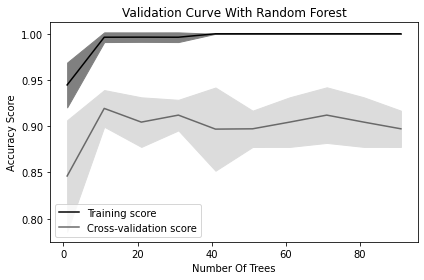

In [195]:
# Validation Curve for Random Forest for original Sample
num_est=np.arange(1,101,10)


train_scores, test_scores=validation_curve(RandomForestClassifier(), 
                                            X=X_train, y=y_train, 
                                            param_name='n_estimators',
                                            param_range=num_est,
                                            cv=3)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(num_est, train_mean, label="Training score", color="black")
plt.plot(num_est, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(num_est, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(num_est, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

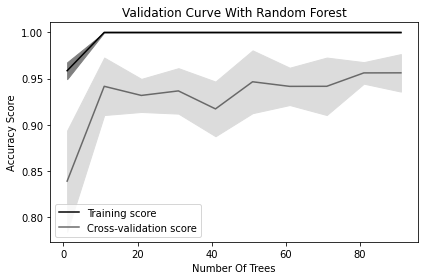

In [202]:
# Validation Curve for Random Forest for Upsampling Data Set
num_est=np.arange(1,101,10)


train_scores, test_scores=validation_curve(RandomForestClassifier(), 
                                            X=X_train_upsample, y=y_train_upsample, 
                                            param_name='n_estimators',
                                            param_range=num_est,
                                            cv=3)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(num_est, train_mean, label="Training score", color="black")
plt.plot(num_est, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(num_est, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(num_est, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

<font color=darkblue>

# Cross Tab for Decision Tree Model: 

   - <b> Confusion Matrix  for Test Set without Upsampling </b>

| Total=59 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 6 | 13 | 19 |
| Actual 1   | 0 | 40| 40 |
| Col Total | 6 | 53 | 59|

   - Of the 40 Actual patients with Parkinson Disorder, the model correctly classified 40 patients with Parkinson Disorder.
   - Of the 19 Healthy patients, the model correctly classified 6 patients as Healthy Patients.
   - 13 Patients who are healthy are predicted with PD disorder, which are Type- 1 error.
   - There is no type -2 error.
   - This model is overfit as the Type-2 error is 0.
   
- <b> Confusion Matrix  for Test Set with Upsampling </b>

| Total=89 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 38 | 10 | 48 |
| Actual 1   | 10 | 31| 41 |
| Col Total | 48 | 41 | 89|

   - Of the 41 Actual patients with Parkinson Disorder, the model correctly classified 31 patients with Parkinson Disorder.
   - Of the 48 Healthy patients, the model correctly classified 38 patients as Healthy Patients.
   - 10 Patients who are healthy are predicted with PD disorder, which are Type- 1 error.
   - 10 Patients who have PD disorder but predicted as healthy, which are Type- 2 error.
   - <b> From the above Validation curve for both the original and Upsampled Data set we can conclude that the n_estimators within 10 i.e if the tree size is within 10 we are getting optimal score for both Training and Testing.  If the tree size increase from 10 the model becomes Overfit.</b>